# SFO Crime Classification

##Police Department Incident Reports: Historical 2018 to Present

SF OpenData - an open data catalog of San Francisco has provided 12 years of crime data dated from 2003 to 2018. These criminal records are mostly the incidents derived from SFPD Crime Incident Reporting System. They have published this dataset on Kaggle.


###Reference:

1. https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

2. https://www.kaggle.com/code/flafuji/sf-crime-eda-visualization-model-explained

3. https://github.com/joshlingy/SF-crime-data-analysis-and-modeling/blob/master/SF%20crime%20data%20analysis%20and%20modeling.ipynb

4. https://www.kaggle.com/code/klyushnik/san-francisco-crimes-catboostclassifier

5. https://towardsdatascience.com/deep-dive-into-sf-crime-cb8f5870a9f6

6. https://www.kaggle.com/code/abhishekr7/time-series-forecasting-on-crimes-in-boston

7. https://jovian.com/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C159

8. https://www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/

9. https://github.com/marcellusruben/sf-crime-voila

10. https://www.dominodatalab.com/blog/creating-interactive-crime-maps-with-folium

In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

Install Geopandas for the MAP Visualization

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.0 MB/s eta 0:00:00


### Import Libraries

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [5]:
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
%cd ./gdrive/Shareddrives/'ISE 244'/Dataset

/content/gdrive/Shareddrives/ISE 244/Dataset


## Data Overview

The dataset has 19 columns and the target attribute is Incident category

Link: https://data.sfgov.org/browse

In [8]:
df_2018_Pres = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv") 

In [9]:
df_2018_Pres_req = pd.DataFrame()

## Mapping the data to address as part of AI Problem

Standardize the columns that can be mapped to similar dataset of 2018 to present 

In [10]:
df_2018_Pres_req["Incident_Datetime"] = df_2018_Pres["Incident Datetime"]
df_2018_Pres_req["Report_Datetime"] = df_2018_Pres["Report Datetime"]
df_2018_Pres_req["Report Type Code"] = df_2018_Pres["Report Type Code"]
df_2018_Pres_req["Report Type Description"] = df_2018_Pres["Report Type Description"]
df_2018_Pres_req["Filed Online"] = df_2018_Pres["Filed Online"]
df_2018_Pres_req["Incident_Date"] = df_2018_Pres["Incident Date"]
df_2018_Pres_req["Incident_Time"] = df_2018_Pres["Incident Time"]
df_2018_Pres_req["Incident_Year"] = df_2018_Pres["Incident Year"]
df_2018_Pres_req["DayOfWeek"] = df_2018_Pres["Incident Day of Week"]
df_2018_Pres_req["Incident_Num"] = df_2018_Pres["Incident Number"]
df_2018_Pres_req["Incident_Code"] = df_2018_Pres["Incident Code"]
df_2018_Pres_req["Incident_Cat"] = df_2018_Pres["Incident Category"].astype(str).str.upper()
df_2018_Pres_req["Incident_Desc"] = df_2018_Pres["Incident Description"]
df_2018_Pres_req["Incident Subcategory"] = df_2018_Pres["Incident Subcategory"]
df_2018_Pres_req["Address"] = df_2018_Pres["Intersection"]
df_2018_Pres_req["Police_Dist"] = df_2018_Pres["Police District"]
df_2018_Pres_req["Resolution"] = df_2018_Pres["Resolution"]
df_2018_Pres_req["Analysis_Neigh"] = df_2018_Pres["Analysis Neighborhood"]
df_2018_Pres_req["Neighborhoods"] = df_2018_Pres["Neighborhoods"]
df_2018_Pres_req["Central_Mar_Ten_Boun"] = df_2018_Pres["Central Market/Tenderloin Boundary Polygon - Updated"]
df_2018_Pres_req["Civic_Cen_Har_Red"] = df_2018_Pres["Civic Center Harm Reduction Project Boundary"]
df_2018_Pres_req["Cur_Pol_Dist"] = df_2018_Pres["Current Police Districts"]
df_2018_Pres_req["Cur_Sup_Dist"] = df_2018_Pres["Current Supervisor Districts"]
df_2018_Pres_req["HSOC_Zones"] = df_2018_Pres["HSOC Zones as of 2018-06-05"]
df_2018_Pres_req["Latitude"] = df_2018_Pres["Latitude"]
df_2018_Pres_req["Longitude"] = df_2018_Pres["Longitude"]

Address the null values of the mapped columns

In [11]:
df_2018_Pres_req.loc[:, "Analysis_Neigh"] = df_2018_Pres_req.loc[:, "Analysis_Neigh"].fillna(0)
df_2018_Pres_req.loc[:, "Neighborhoods"] = df_2018_Pres_req.loc[:, "Neighborhoods"].fillna(0)
df_2018_Pres_req.loc[:, "Central_Mar_Ten_Boun"] = df_2018_Pres_req.loc[:, "Central_Mar_Ten_Boun"].fillna(0)
df_2018_Pres_req.loc[:, "Civic_Cen_Har_Red"] = df_2018_Pres_req.loc[:, "Civic_Cen_Har_Red"].fillna(0)
df_2018_Pres_req.loc[:, "Cur_Pol_Dist"] = df_2018_Pres_req.loc[:, "Cur_Pol_Dist"].fillna(0)
df_2018_Pres_req.loc[:, "Cur_Sup_Dist"] = df_2018_Pres_req.loc[:, "Cur_Sup_Dist"].fillna(0)
df_2018_Pres_req.loc[:, "HSOC_Zones"] = df_2018_Pres_req.loc[:, "HSOC_Zones"].fillna(0)

Verification for nulls

In [12]:
df_2018_Pres_req.isnull().sum()

Incident_Datetime               0
Report_Datetime                 0
Report Type Code                0
Report Type Description         0
Filed Online               560230
Incident_Date                   0
Incident_Time                   0
Incident_Year                   0
DayOfWeek                       0
Incident_Num                    0
Incident_Code                   0
Incident_Cat                    0
Incident_Desc                   0
Incident Subcategory          583
Address                     37193
Police_Dist                     0
Resolution                      0
Analysis_Neigh                  0
Neighborhoods                   0
Central_Mar_Ten_Boun            0
Civic_Cen_Har_Red               0
Cur_Pol_Dist                    0
Cur_Sup_Dist                    0
HSOC_Zones                      0
Latitude                    37193
Longitude                   37193
dtype: int64

Sample data

In [13]:
df_2018_Pres_req.head()

Incident_Datetime Report_Datetime Report Type Code Report Type Description  \
0      7/25/21 0:00   7/25/21 13:41               II        Coplogic Initial   
1     6/28/22 23:58   6/28/22 23:58               VS      Vehicle Supplement   
2     3/11/22 10:30   3/11/22 20:03               II        Coplogic Initial   
3     5/15/21 17:47   5/15/21 17:47               VS      Vehicle Supplement   
4     6/28/22 17:22   6/28/22 17:22               VS      Vehicle Supplement   

  Filed Online Incident_Date Incident_Time  Incident_Year DayOfWeek  \
0         True    2021-07-25       0:00:00           2021    Sunday   
1          NaN    2022-06-28      23:58:00           2022   Tuesday   
2         True    2022-03-11      10:30:00           2022    Friday   
3          NaN    2021-05-15      17:47:00           2021  Saturday   
4          NaN    2022-06-28      17:22:00           2022   Tuesday   

   Incident_Num  ...      Resolution Analysis_Neigh Neighborhoods  \
0     216105573  ...  Open or Active              0           0.0   
1     220264913  ...  Open or Active              0           0.0   
2     226040232  ...  Open or Active              0           0.0   
3     210183345  ...  Open or Active              0           0.0   
4     220361741  ...  Open or Active              0           0.0   

  Central_Mar_Ten_Boun Civic_Cen_Har_Red Cur_Pol_Dist Cur_Sup_Dist HSOC_Zones  \
0                  0.0               0.0          0.0          0.0        0.0   
1                  0.0               0.0          0.0          0.0        0.0   
2                  0.0               0.0          0.0          0.0        0.0   
3                  0.0               0.0          0.0          0.0        0.0   
4                  0.0               0.0          0.0          0.0        0.0   

   Latitude  Longitude  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 26 columns]

## Time Manupulation

Function to create the new feature Year, Month, day, Hour, Week_of_year, TimeOfDay and SeasonOfYear

In [14]:
def time_engineer(data):
    '''
    Extract temporal features from dates.
    '''
    # Turn strings into timestamp objects
    data.Incident_Datetime = pd.to_datetime(data.Incident_Datetime)

    # Extract years, months, times of the day, and weeks of year
    data['Year'] = data['Incident_Datetime'].dt.year
    data['Month'] = data['Incident_Datetime'].dt.month
    data['Day'] = data['Incident_Datetime'].dt.day
    data['Hour'] = data['Incident_Datetime'].dt.hour
    data['Week_Of_Year'] = data['Incident_Datetime'].dt.weekofyear


    # Add times of a day as String
    data.loc[(data['Hour']< 6) & (data['Hour']>=0),'TimeOfDay'] = 'Night'
    data.loc[(data['Hour']>=6) & (data['Hour']<12),'TimeOfDay'] = 'Morning'
    data.loc[(data['Hour']>=12) & (data['Hour']<18),'TimeOfDay'] = 'Afternoon'
    data.loc[(data['Hour']>=18) & (data['Hour']<24),'TimeOfDay'] = 'Evening'
    
    # Add seasons as String
    data.loc[(data['Month']>=3) & (data['Month']<6),'SeasonOfYear'] = 'Spring'
    data.loc[(data['Month']>=6) & (data['Month']<9),'SeasonOfYear'] = 'Summer'
    data.loc[(data['Month']>=9) & (data['Month']<12),'SeasonOfYear'] = 'Autumn'
    data.loc[(data['Month']<=2) | (data['Month']==12),'SeasonOfYear'] = 'Winter'
       
    return data

In [15]:
time_engineer(df_2018_Pres_req)

Incident_Datetime Report_Datetime Report Type Code  \
0      2021-07-25 00:00:00   7/25/21 13:41               II   
1      2022-06-28 23:58:00   6/28/22 23:58               VS   
2      2022-03-11 10:30:00   3/11/22 20:03               II   
3      2021-05-15 17:47:00   5/15/21 17:47               VS   
4      2022-06-28 17:22:00   6/28/22 17:22               VS   
...                    ...             ...              ...   
701201 2023-02-21 16:30:00    3/2/23 19:29               II   
701202 2023-03-02 17:33:00    3/2/23 17:33               II   
701203 2023-03-02 03:42:00     3/2/23 3:42               II   
701204 2023-03-01 16:50:00    3/1/23 16:55               IS   
701205 2023-01-13 09:22:00    1/13/23 9:35               II   

       Report Type Description Filed Online Incident_Date Incident_Time  \
0             Coplogic Initial         True    2021-07-25       0:00:00   
1           Vehicle Supplement          NaN    2022-06-28      23:58:00   
2             Coplogic Initial         True    2022-03-11      10:30:00   
3           Vehicle Supplement          NaN    2021-05-15      17:47:00   
4           Vehicle Supplement          NaN    2022-06-28      17:22:00   
...                        ...          ...           ...           ...   
701201                 Initial          NaN    2023-02-21      16:30:00   
701202                 Initial          NaN    2023-03-02      17:33:00   
701203                 Initial          NaN    2023-03-02       3:42:00   
701204      Initial Supplement          NaN    2023-03-01      16:50:00   
701205                 Initial          NaN    2023-01-13       9:22:00   

        Incident_Year  DayOfWeek  Incident_Num  ...  HSOC_Zones   Latitude  \
0                2021     Sunday     216105573  ...         0.0        NaN   
1                2022    Tuesday     220264913  ...         0.0        NaN   
2                2022     Friday     226040232  ...         0.0        NaN   
3                2021   Saturday     210183345  ...         0.0        NaN   
4                2022    Tuesday     220361741  ...         0.0        NaN   
...               ...        ...           ...  ...         ...        ...   
701201           2023    Tuesday     230151037  ...         0.0  37.772831   
701202           2023   Thursday     230150841  ...         0.0  37.784236   
701203           2023   Thursday     230148959  ...         0.0  37.716039   
701204           2023  Wednesday     230138740  ...         1.0  37.780535   
701205           2023     Friday     239000114  ...         0.0  37.773467   

         Longitude  Year Month Day Hour Week_Of_Year  TimeOfDay  SeasonOfYear  
0              NaN  2021     7  25    0           29      Night        Summer  
1              NaN  2022     6  28   23           26    Evening        Summer  
2              NaN  2022     3  11   10           10    Morning        Spring  
3              NaN  2021     5  15   17           19  Afternoon        Spring  
4              NaN  2022     6  28   17           26  Afternoon        Summer  
...            ...   ...   ...  ..  ...          ...        ...           ...  
701201 -122.391374  2023     2  21   16            8  Afternoon        Winter  
701202 -122.417707  2023     3   2   17            9  Afternoon        Spring  
701203 -122.440255  2023     3   2    3            9      Night        Spring  
701204 -122.408161  2023     3   1   16            9  Afternoon        Spring  
701205 -122.391434  2023     1  13    9            2    Morning        Winter  

[701206 rows x 33 columns]

# This is For the dataset from 2003 to 2018

Filter and exclude the invalid/not better fit values

In [16]:
data = df_2018_Pres_req[df_2018_Pres_req["Latitude"].notnull()]

In [17]:
data.head()

Incident_Datetime Report_Datetime Report Type Code  \
25 2021-05-15 13:56:00   5/15/21 14:02               II   
26 2021-05-15 17:03:00   5/15/21 21:14               II   
27 2021-05-15 03:47:00    5/15/21 3:47               II   
28 2021-05-15 10:05:00   5/15/21 10:15               II   
29 2021-05-15 16:25:00   5/15/21 16:25               IS   

   Report Type Description Filed Online Incident_Date Incident_Time  \
25                 Initial          NaN    2021-05-15      13:56:00   
26                 Initial          NaN    2021-05-15      17:03:00   
27                 Initial          NaN    2021-05-15       3:47:00   
28                 Initial          NaN    2021-05-15      10:05:00   
29      Initial Supplement          NaN    2021-05-15      16:25:00   

    Incident_Year DayOfWeek  Incident_Num  ...  HSOC_Zones   Latitude  \
25           2021  Saturday     210298734  ...         0.0  37.726236   
26           2021  Saturday     210299390  ...         0.0  37.805497   
27           2021  Saturday     210297924  ...         0.0  37.772790   
28           2021  Saturday     210298198  ...         0.0  37.789837   
29           2021  Saturday     210298966  ...         0.0  37.739853   

     Longitude  Year Month Day Hour Week_Of_Year  TimeOfDay  SeasonOfYear  
25 -122.433624  2021     5  15   13           19  Afternoon        Spring  
26 -122.422007  2021     5  15   17           19  Afternoon        Spring  
27 -122.447497  2021     5  15    3           19      Night        Spring  
28 -122.434027  2021     5  15   10           19    Morning        Spring  
29 -122.391268  2021     5  15   16           19  Afternoon        Spring  

[5 rows x 33 columns]

##Exploratory Data Analysis

### Data Visualization

Visualize the data for DayOfWeek, Police Distict, Resolution and Incident category

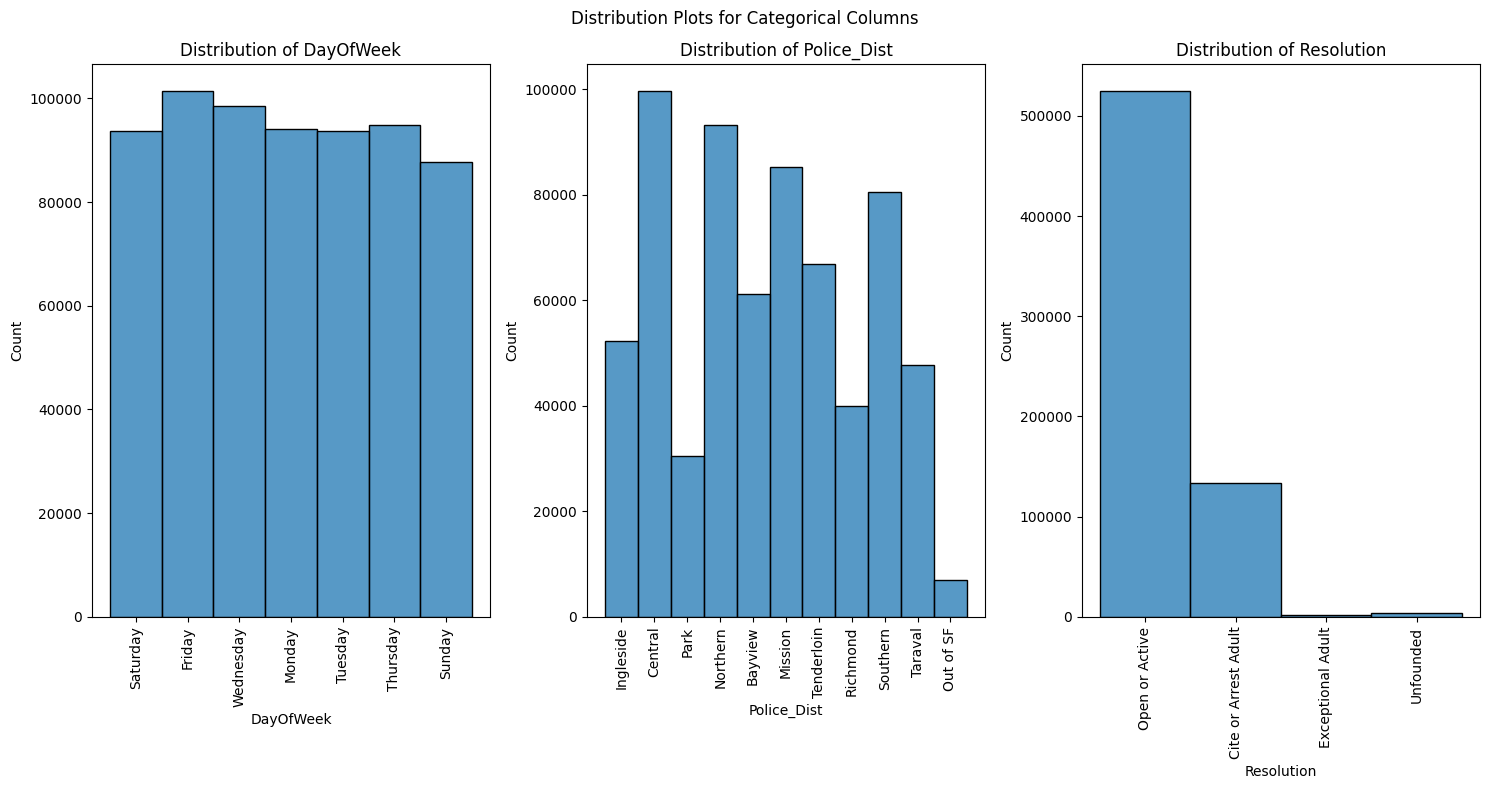

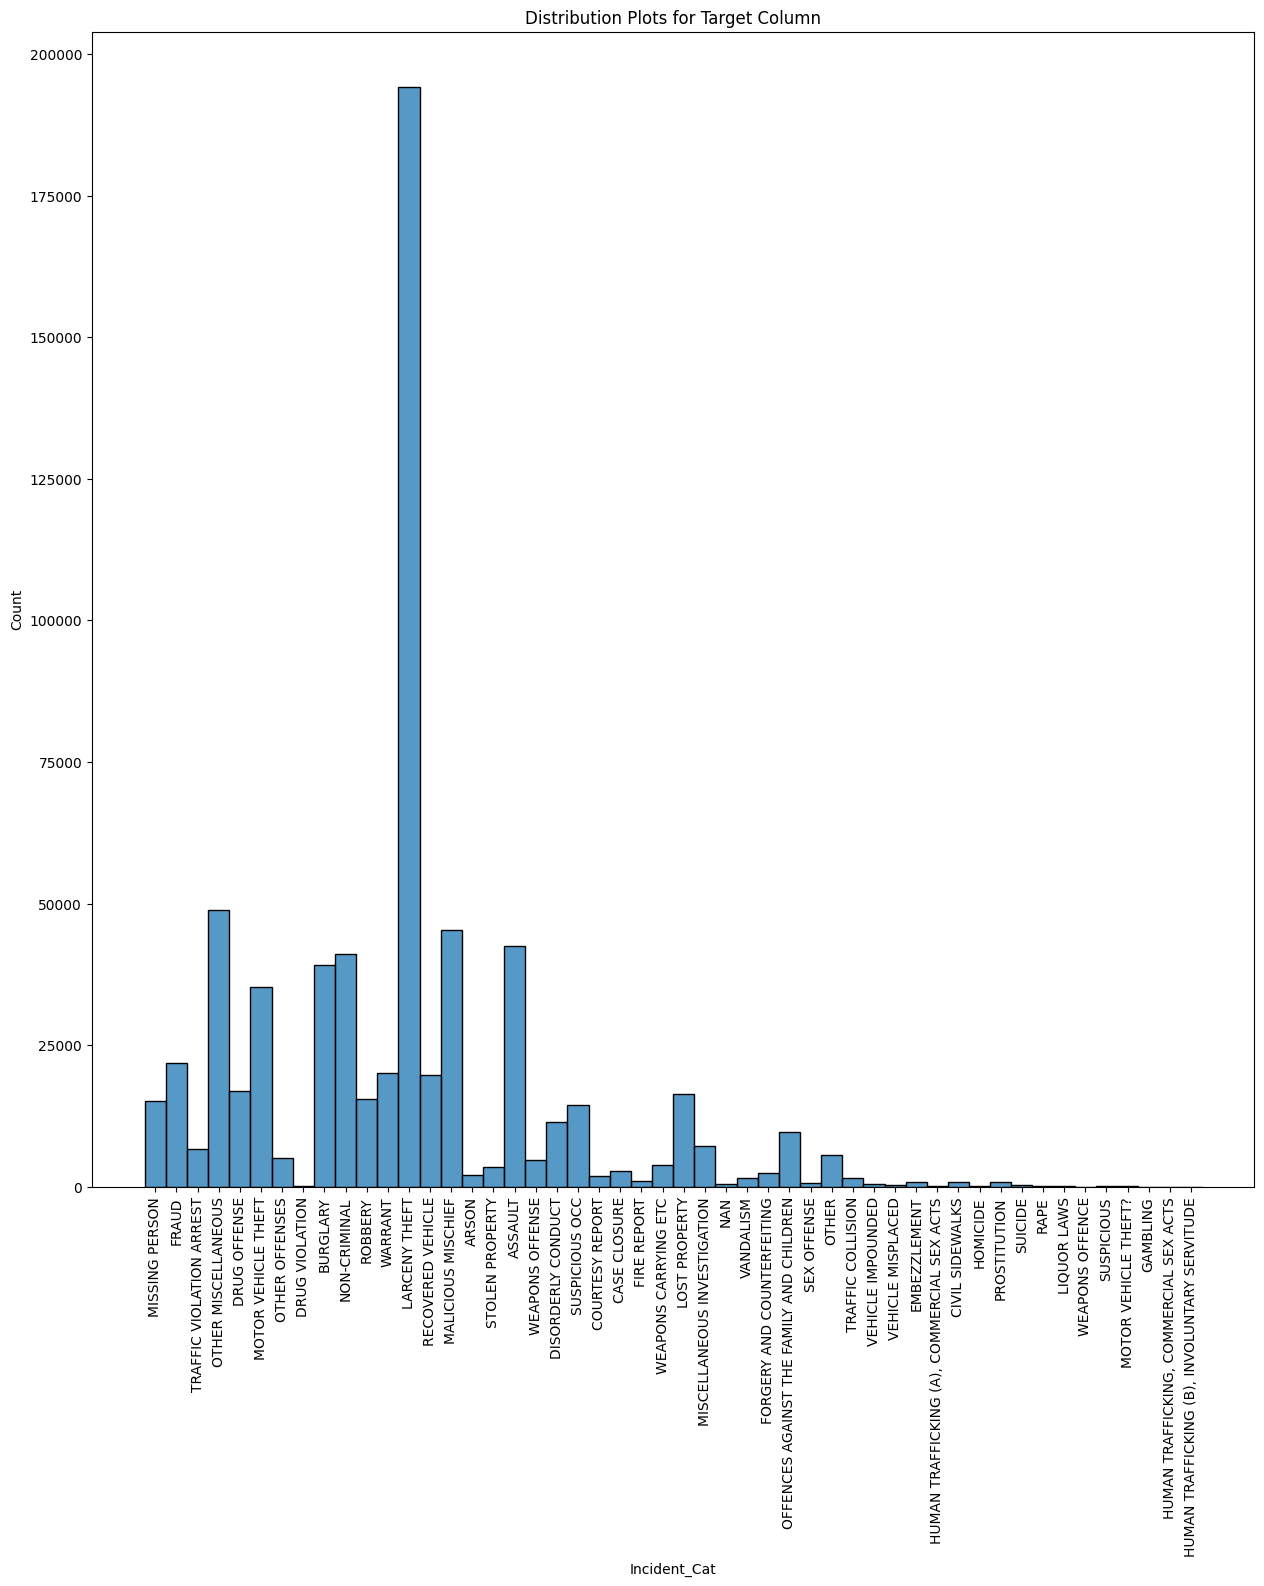

In [18]:
# categorical columns
categorical_columns_for_visualization = ['DayOfWeek', 'Police_Dist','Resolution']
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Distribution Plots for Categorical Columns')
axes = axes.ravel()
for index,col in enumerate(categorical_columns_for_visualization): 
    sns.histplot(data[col],ax=axes[index])
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_title('Distribution of %s' %col )
fig.tight_layout();

# target columns
target_column_for_visualization = 'Incident_Cat'
plt.figure(figsize=(15,15))
sns.histplot(data[target_column_for_visualization])
plt.xticks(rotation=90)
plt.title('Distribution Plots for Target Column')
fig.tight_layout();

LARCENTY THEFT is the highest number of crimes commited as per the police record.

Friday is the peak window for the crime and Most of the police department are falling into high number of crimes.

Identify the mapping values for the incident category

In [19]:
j=0
for i in data['Incident_Cat'].sort_values().unique():
    j +=1
    print("'" + str(i) +"':" + str(j) + ",")

'ARSON':1,
'ASSAULT':2,
'BURGLARY':3,
'CASE CLOSURE':4,
'CIVIL SIDEWALKS':5,
'COURTESY REPORT':6,
'DISORDERLY CONDUCT':7,
'DRUG OFFENSE':8,
'DRUG VIOLATION':9,
'EMBEZZLEMENT':10,
'FIRE REPORT':11,
'FORGERY AND COUNTERFEITING':12,
'FRAUD':13,
'GAMBLING':14,
'HOMICIDE':15,
'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS':16,
'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE':17,
'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS':18,
'LARCENY THEFT':19,
'LIQUOR LAWS':20,
'LOST PROPERTY':21,
'MALICIOUS MISCHIEF':22,
'MISCELLANEOUS INVESTIGATION':23,
'MISSING PERSON':24,
'MOTOR VEHICLE THEFT':25,
'MOTOR VEHICLE THEFT?':26,
'NAN':27,
'NON-CRIMINAL':28,
'OFFENCES AGAINST THE FAMILY AND CHILDREN':29,
'OTHER':30,
'OTHER MISCELLANEOUS':31,
'OTHER OFFENSES':32,
'PROSTITUTION':33,
'RAPE':34,
'RECOVERED VEHICLE':35,
'ROBBERY':36,
'SEX OFFENSE':37,
'STOLEN PROPERTY':38,
'SUICIDE':39,
'SUSPICIOUS':40,
'SUSPICIOUS OCC':41,
'TRAFFIC COLLISION':42,
'TRAFFIC VIOLATION ARREST':43,
'VANDALISM':44,
'VEHICLE IMPOUNDED':45,
'V

There are 50 Incident categories.

Identify the geometry value as new column to plat the map

In [20]:
crs = {'init': 'epsg:4326'}

# convention is longitude, latitude
geometry = [Point(xy) for xy in zip( data["Longitude"], data["Latitude"])]

geometry[:3]

[<POINT (-122.434 37.726)>,
 <POINT (-122.422 37.805)>,
 <POINT (-122.447 37.773)>]

In [21]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

<Axes: >

(37.70798826, 37.82999075)

(-122.5112949, -122.3637428)

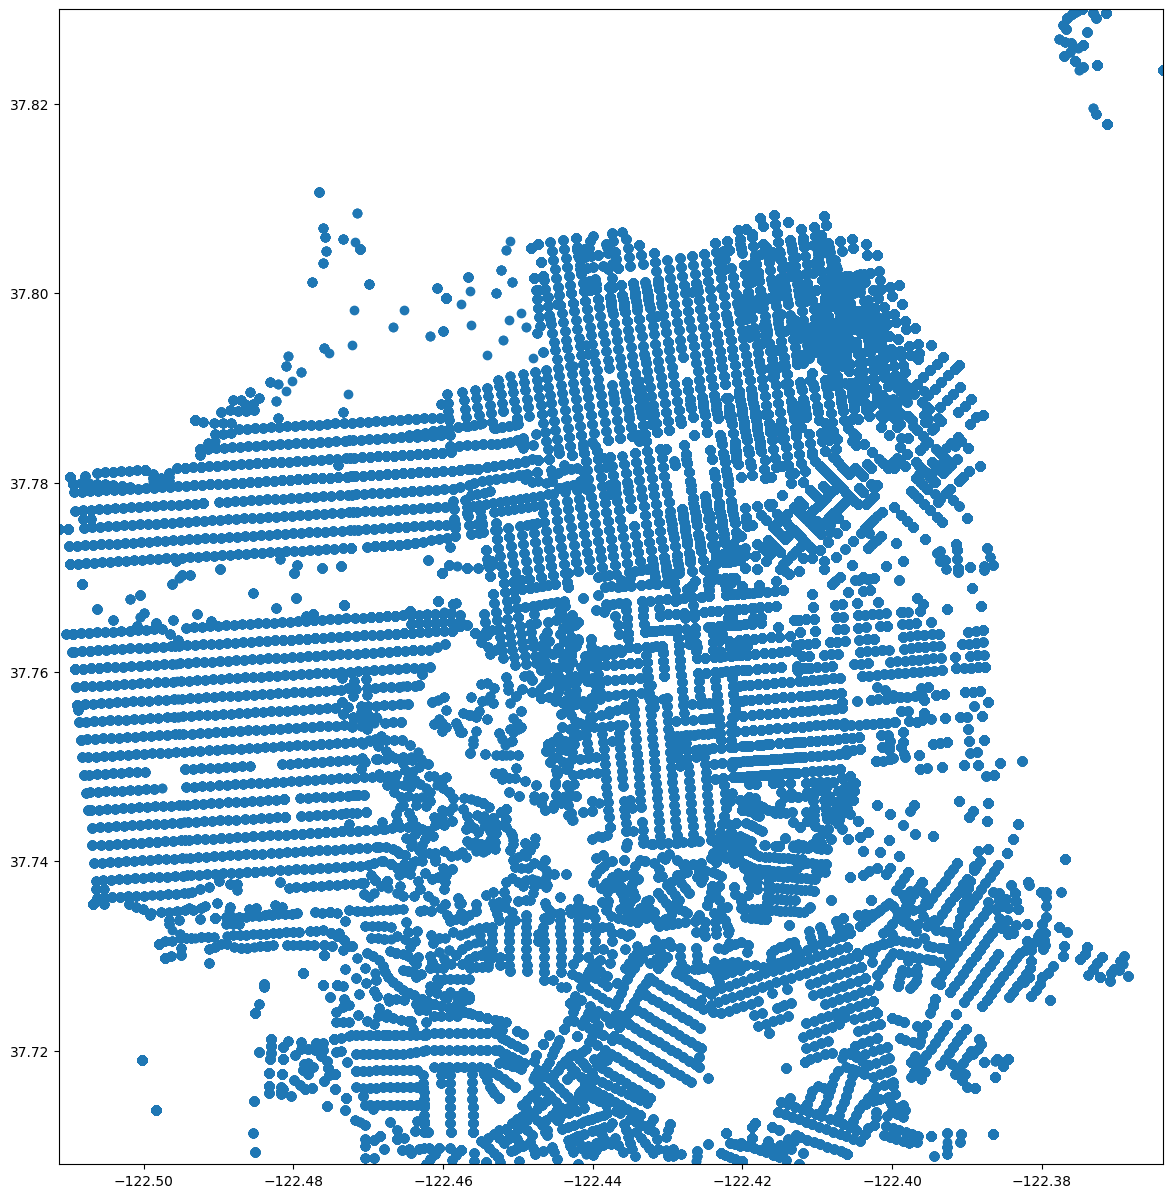

In [22]:
fig, ax = plt.subplots(figsize = (15,15))
geo_df.plot(ax = ax)
ax.set_ylim(data["Latitude"].min(),data["Latitude"].max())
ax.set_xlim(data["Longitude"].min(), data["Longitude"].max())

The map clearly shows more number of incidents are concentrated towards the north of SFO

### Scatterplot map for crime category

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Scatterplot of category crimes')

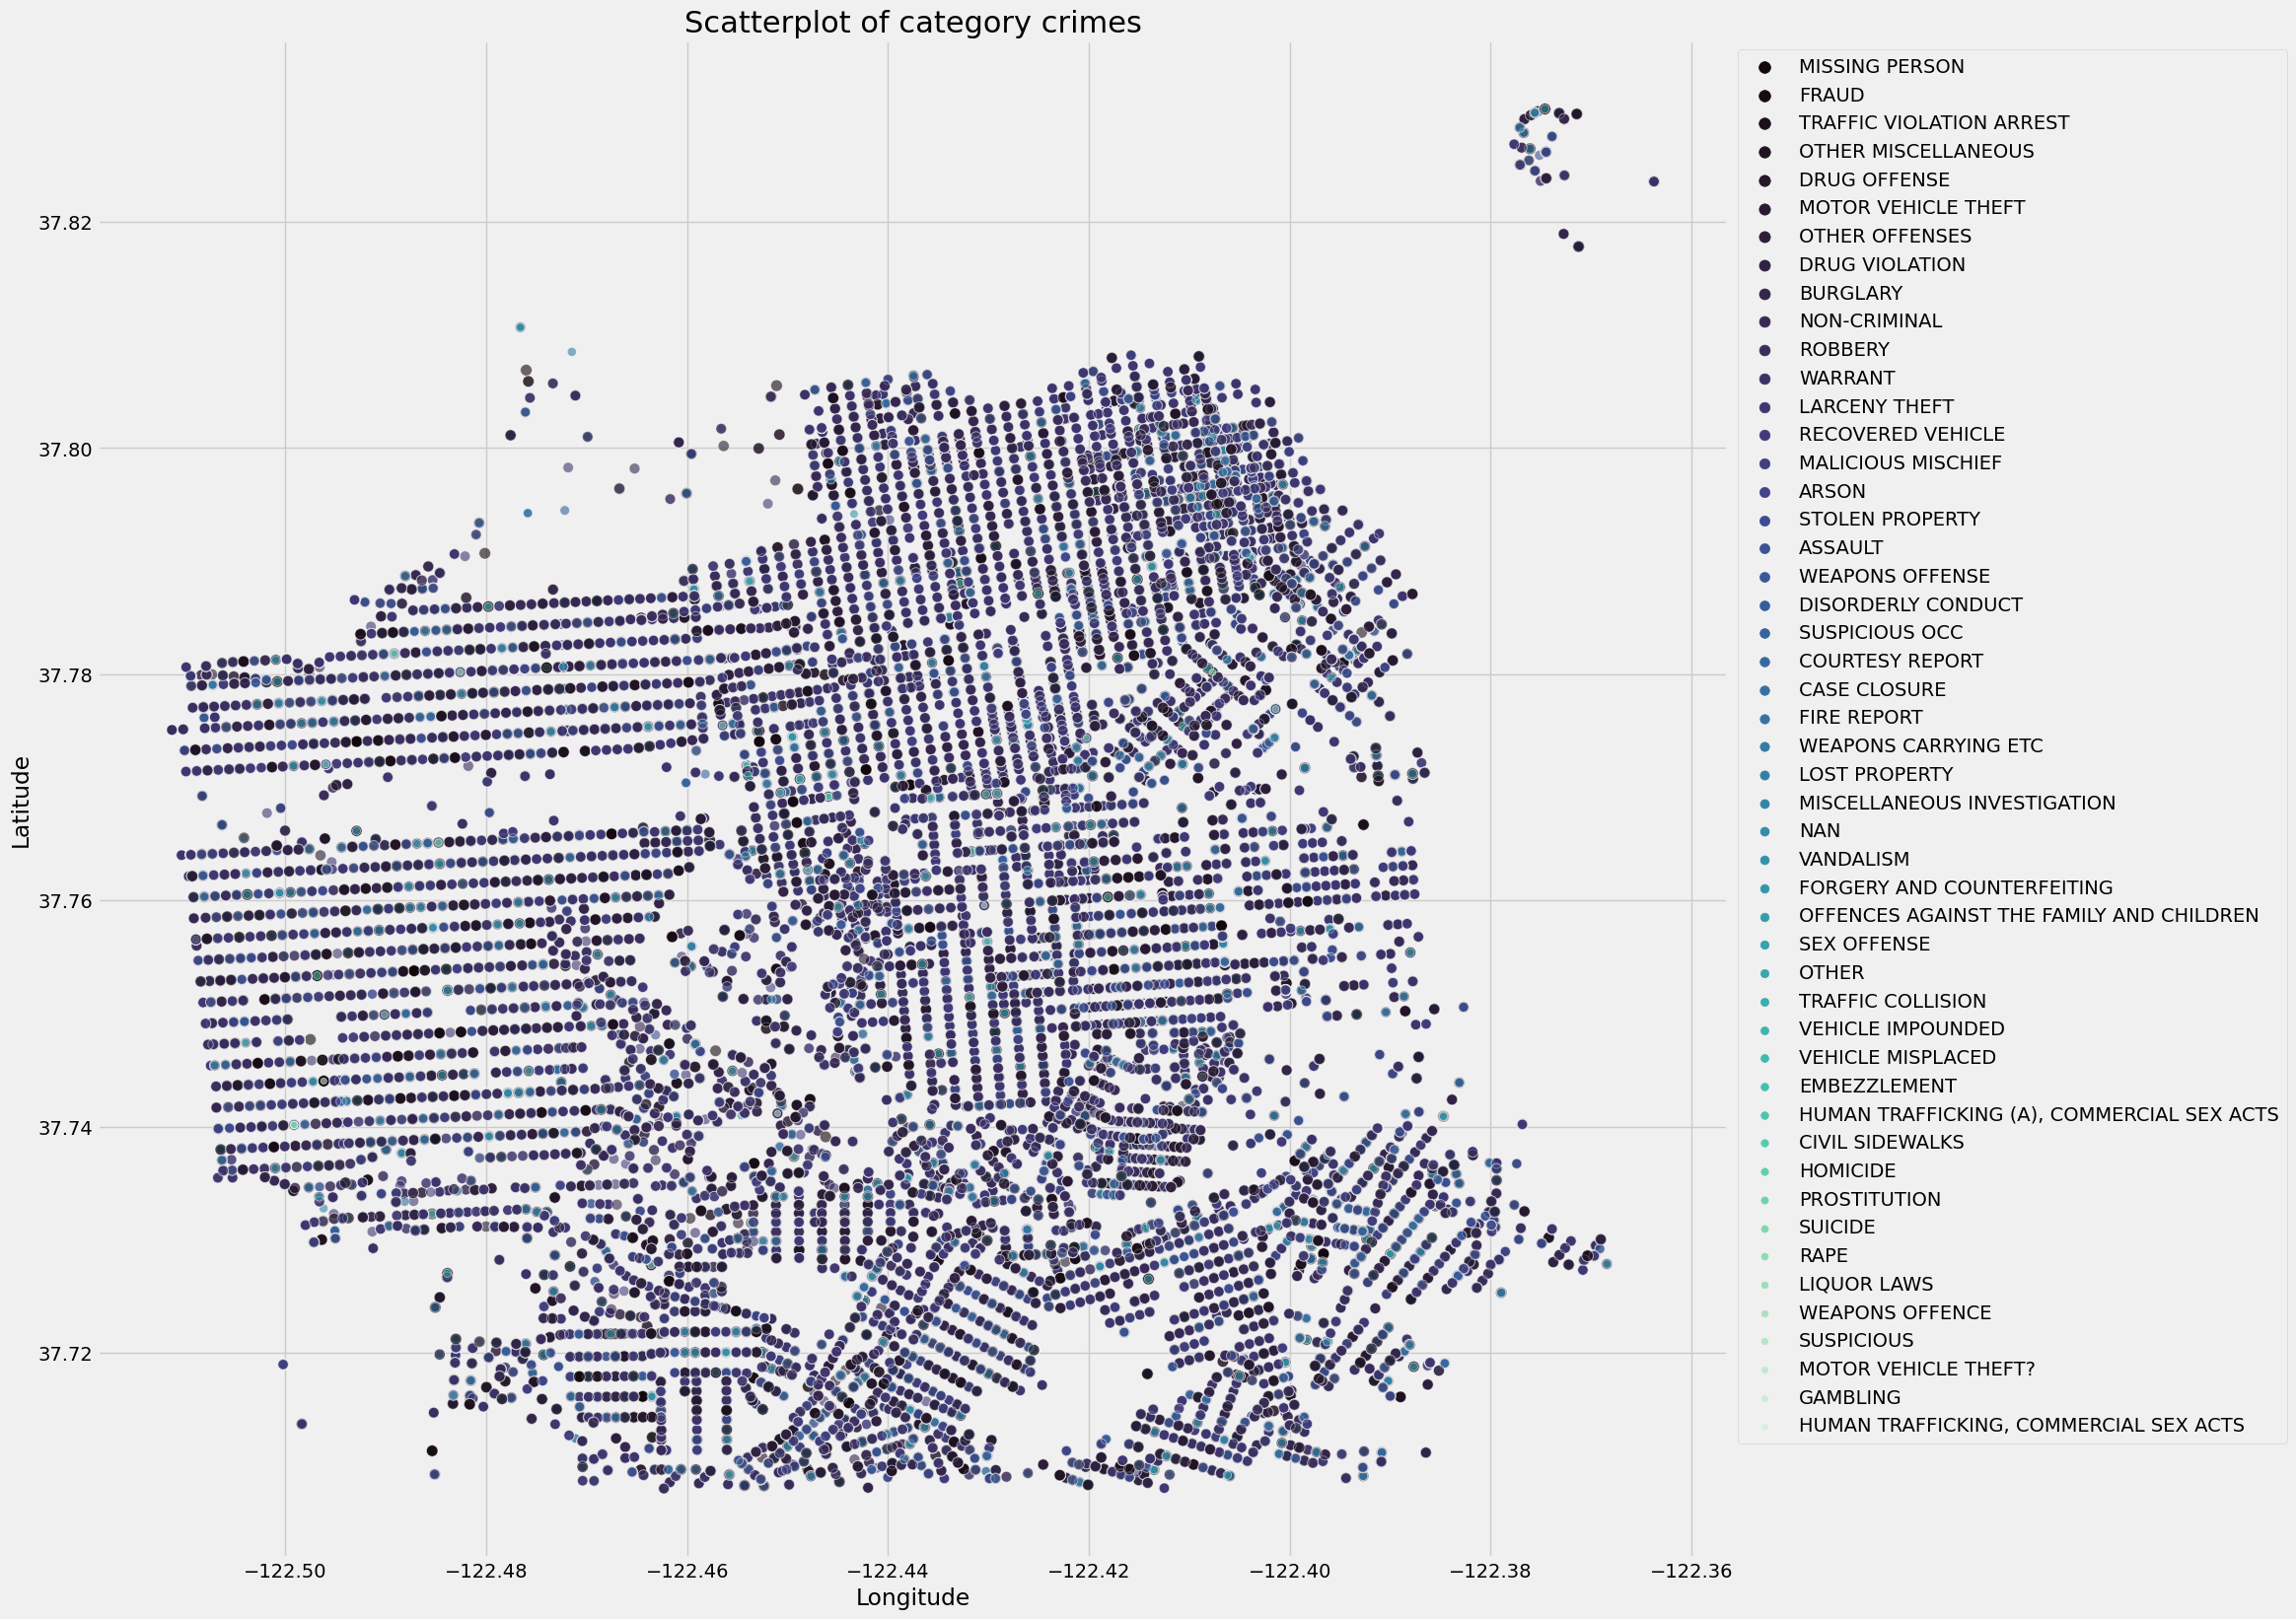

In [23]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=data.iloc[:250000], x='Longitude', y='Latitude', alpha=0.6, palette='mako', hue='Incident_Cat', size='Incident_Cat')
    plt.title("Scatterplot of category crimes", fontsize=22) 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show();

Identify the zone to build the map

In [24]:
by_zone = df_2018_Pres.apply(pd.Series.value_counts).reset_index()

SFO map supporting Json file

In [25]:
import folium

sf_zones = r'./sf_neighborhoods.json'

SF_COORDINATES = (37.76, -122.45)
 

# Create an empty map zoomed in on San Francisco
sf_crime_map = folium.Map(location=SF_COORDINATES, zoom_start=12)


sf_crime_map.choropleth(
    geo_data=sf_zones,
    data=by_zone,
    columns=['index', 'Police District'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco Crime by Neighborhood'
)

sf_crime_map

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def make_subplots_of_categories_by_year(year, df, top=12):
    """Density map subplots to show the top crimes occurred based on the year"""
    
    # San Francisco coordinates
    clat = 37.773972
    clon = -122.431297
    
    # select top 20 based on the frequency
    sf_ = df[df['Year'] == year]
    category_vc = sf_['Incident_Cat'].value_counts().to_frame()
    categories = category_vc.index.to_list()[:top]
    
    # subplots grid
    nrows = 4; ncols = 3
    fig = make_subplots(
        rows=nrows, cols=ncols, subplot_titles=categories,
        specs=[[{"type" : "mapbox"} for i in range(ncols)] for j in range(nrows)]
    )

    r = 1; c = 1
    for name in categories:
        group = sf_[sf_['Incident_Cat'] == name]
        if (c > ncols):
            r += 1
            if (r > nrows): break
            c = 1
        f = go.Densitymapbox(lat=group['Latitude'], lon=group['Longitude'], radius=1)
        fig.add_trace(trace=f, row=r, col=c)
        c += 1
    
    fig.update_layout(
        # autosize=True,
        title=year,
        height=1000, hovermode='closest', showlegend=False,
        margin=dict(l=0, r=0, t=60, b=0)
    )

    fig.update_mapboxes(
        center=dict(lat=clat, lon=clon),
        bearing=0, pitch=0, zoom=10,
        style='carto-positron'
    )
    
    fig.show()
    return None

Distribution of TOP 15 Crimes based on the Map. LARCENCY THEFT, ASSULT, VEHICLE THEFT NARCOTIC, BURGLARY are the top crime activities.

In [27]:
make_subplots_of_categories_by_year(year=2021, df=data)

### Chart to visualize Top 15 common crimes

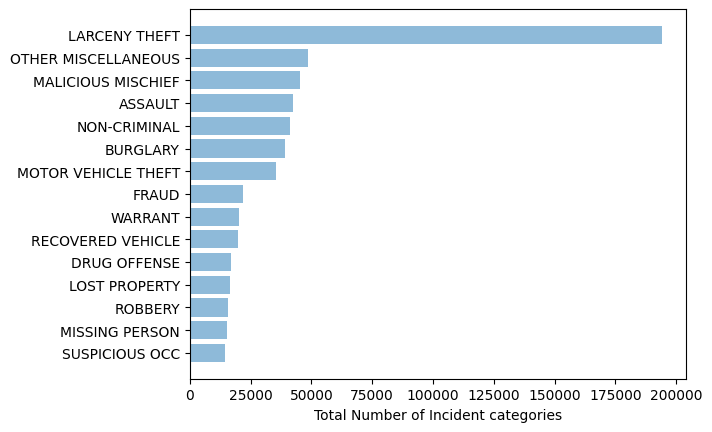

In [28]:

most_common_cat = data['Incident_Cat'].value_counts()[0:15].sort_values()

categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Total Number of Incident categories')
plt.show();

### HeatMap for Incident Category vs Weekday

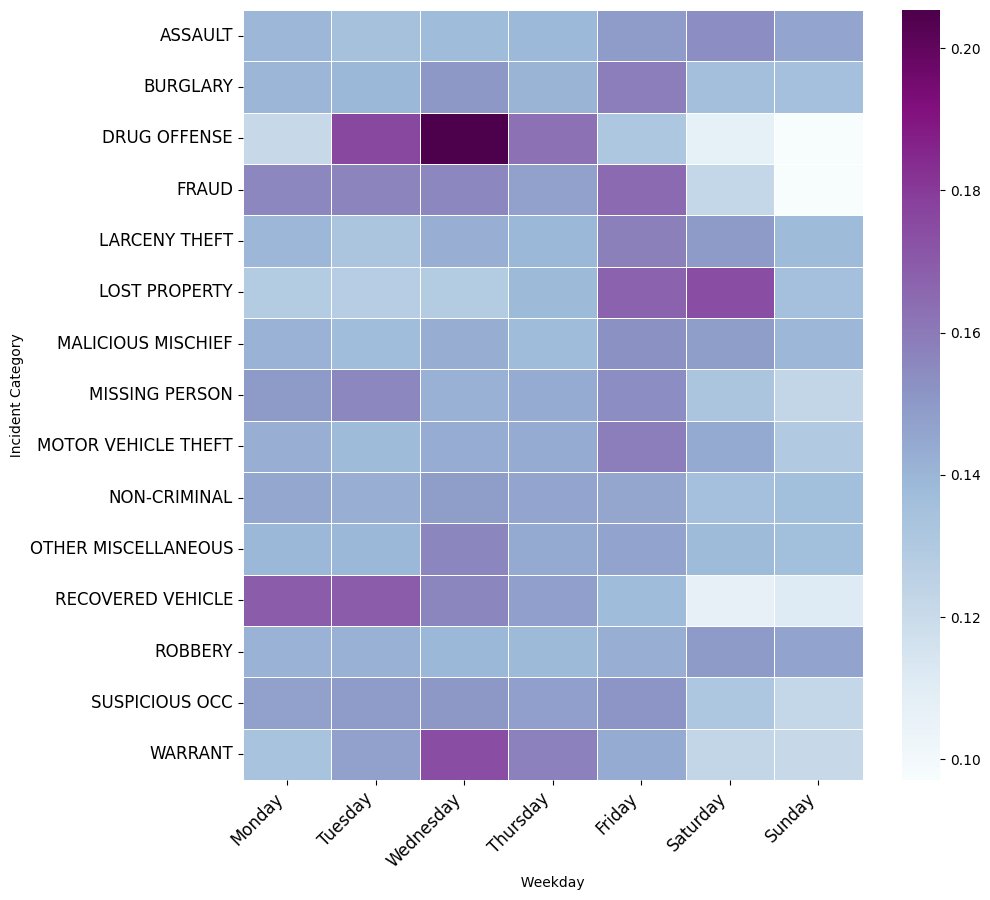

In [29]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['DayOfWeek']) 
# Calculate percentages of crimes
cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Monday', 
                                           'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 
                                           'Saturday','Sunday']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Weekday  ")
plt.ylabel("  Incident Category  ")
plt.show();

Wednesday is peak for Drug offences. Friday is the peak window for Burglary and missing person. Wednesday is peak for Drug/Narcotic crimes.

### Visualize the percentage of resoultion based on category

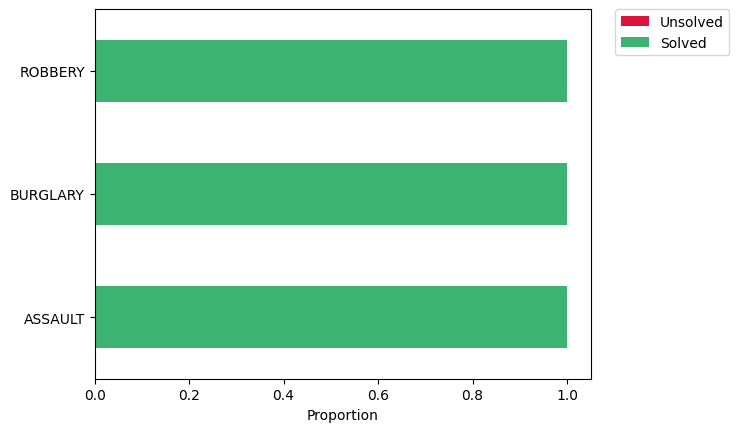

In [30]:
# Pick crime types of interest
violent = data[data.Incident_Cat.isin(['ASSAULT', 'BURGLARY',
                                       'KIDNAPPING', 'ROBBERY',  
                                       'SEX OFFENSES FORCIBLE'])].copy()
# Create Arrest variable
violent['Arrest'] = np.where(violent['Resolution'].isin(['NONE', 'NOT PROSECUTED']), 0,1)

# Calculate counts
arrest_counts = violent['Incident_Cat'][violent.Arrest==1].value_counts()[0:9]
total_counts = violent['Incident_Cat'].value_counts()[0:9]
arrest_counts = arrest_counts/(total_counts).sort_index()
total_counts = total_counts/(total_counts).sort_index()

# Plot values
total_counts.plot.barh(color='crimson', label= 'Unsolved')
arrest_counts.plot.barh(color='mediumseagreen', label='Solved')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Proportion')
plt.show();


Most of the cases are resovlved.

### Visualizing the crime that are happening on Sunday

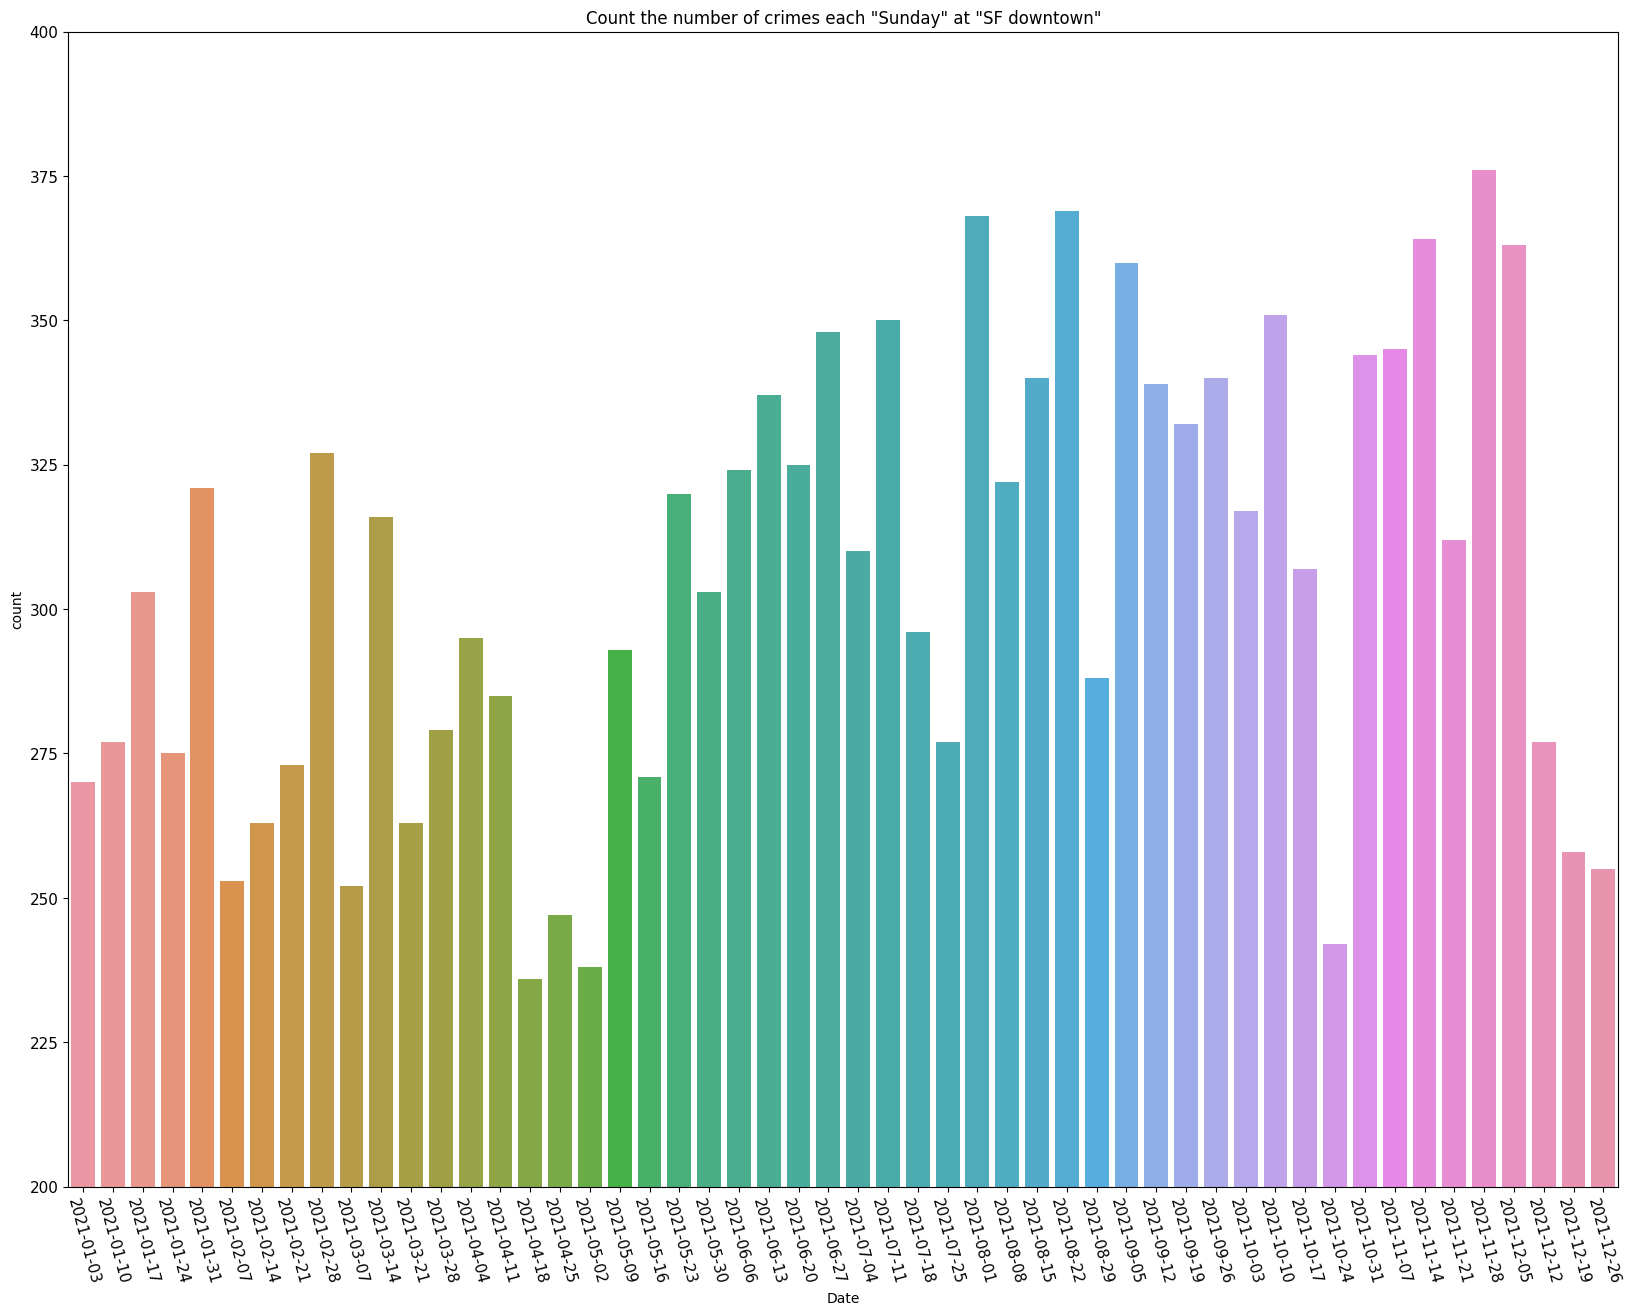

In [31]:
sun_data = data[(data['DayOfWeek'] == 'Sunday') & (data['Year'] == 2021 )].groupby(['Incident_Date','DayOfWeek']).agg({'Incident_Num':['count']})
sun_data.columns = ['Inc_count']
sun_data = sun_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Incident_Date',y='Inc_count',
                 data= sun_data)
ax.set_title('Count the number of crimes each "Sunday" at "SF downtown"')
ax.set_xlabel('Date')
ax.set_ylabel('count')


ax.set_ylim([200,400])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

More number of crimes during summer and Fall seasons.

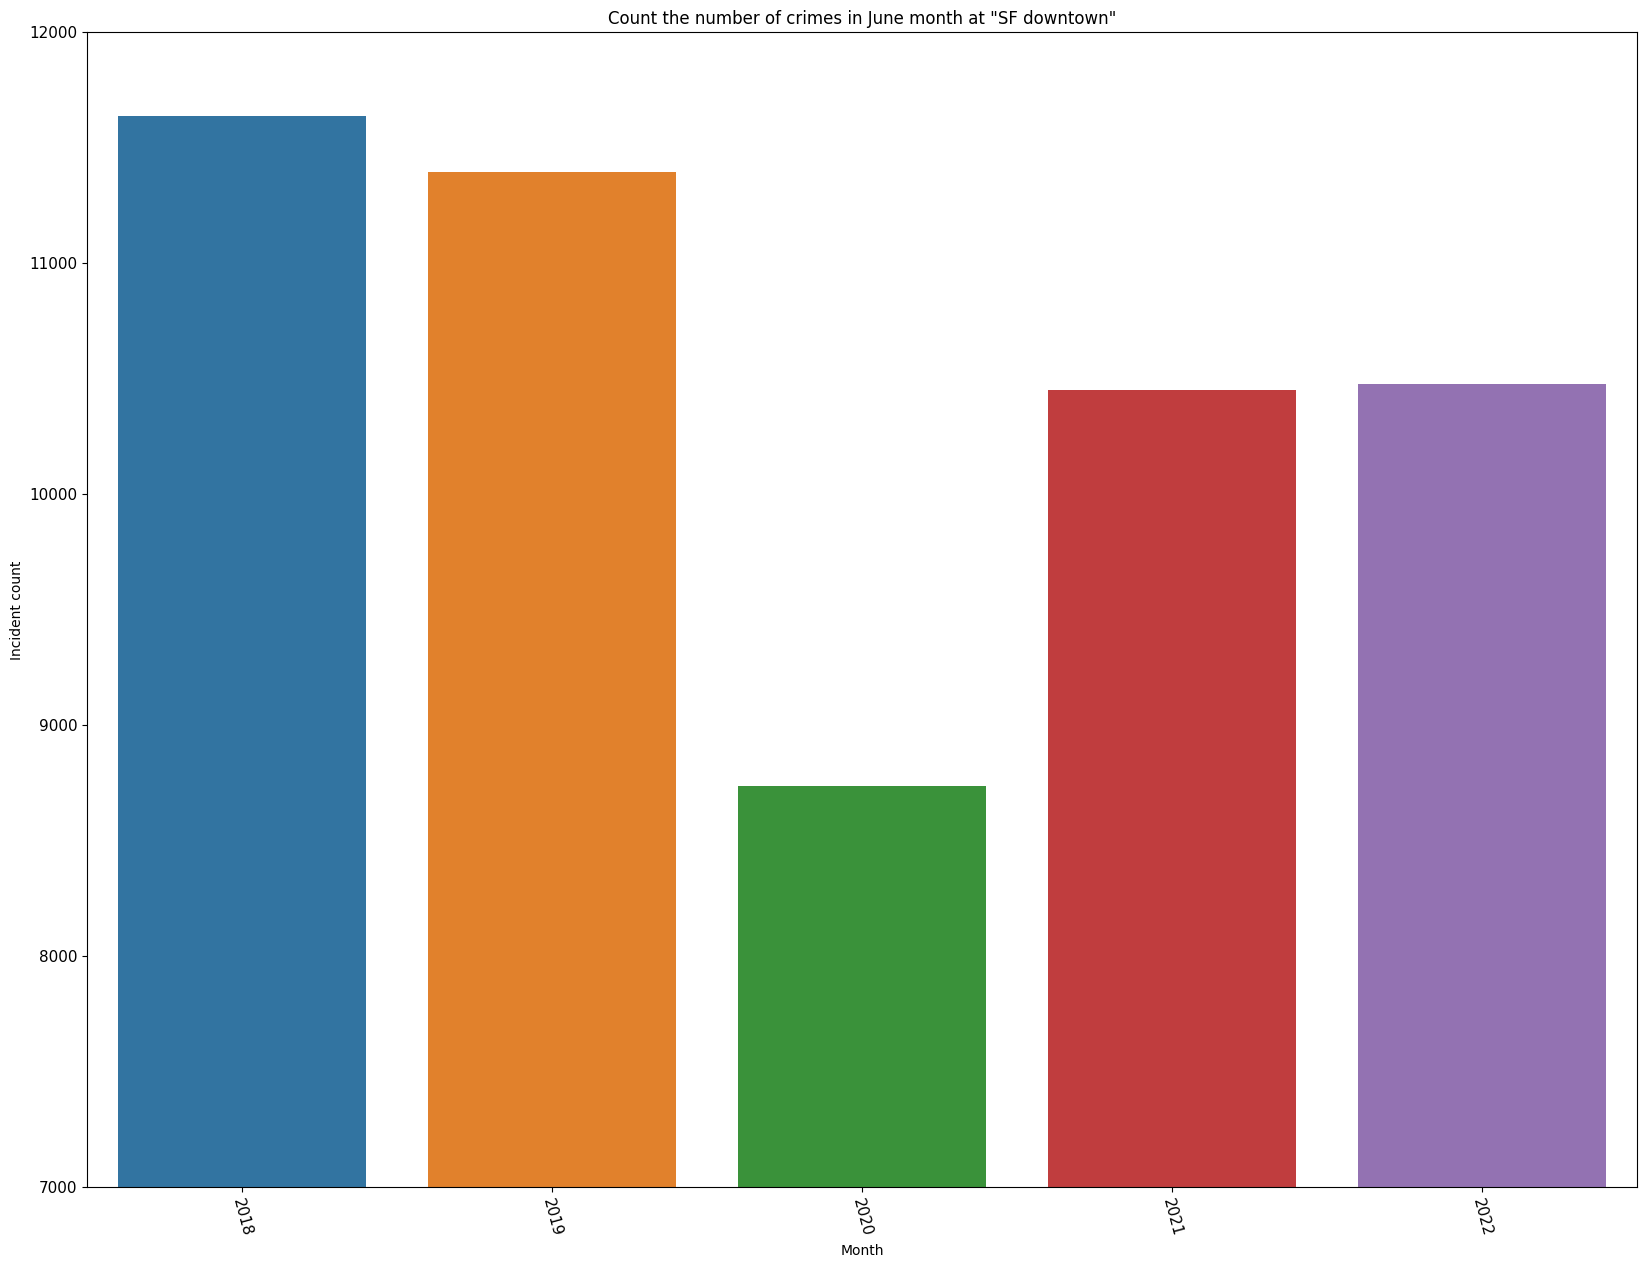

In [32]:
mon_data = data[(data['Month'] == 6)].groupby(['Year','Month']).agg({'Incident_Num':['count']})
mon_data.columns = ['Inc_count']
mon_data = mon_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Year',y='Inc_count',
                 data= mon_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([7000,12000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

The number of crimes has decreased during 2020 might be because of pandamic.

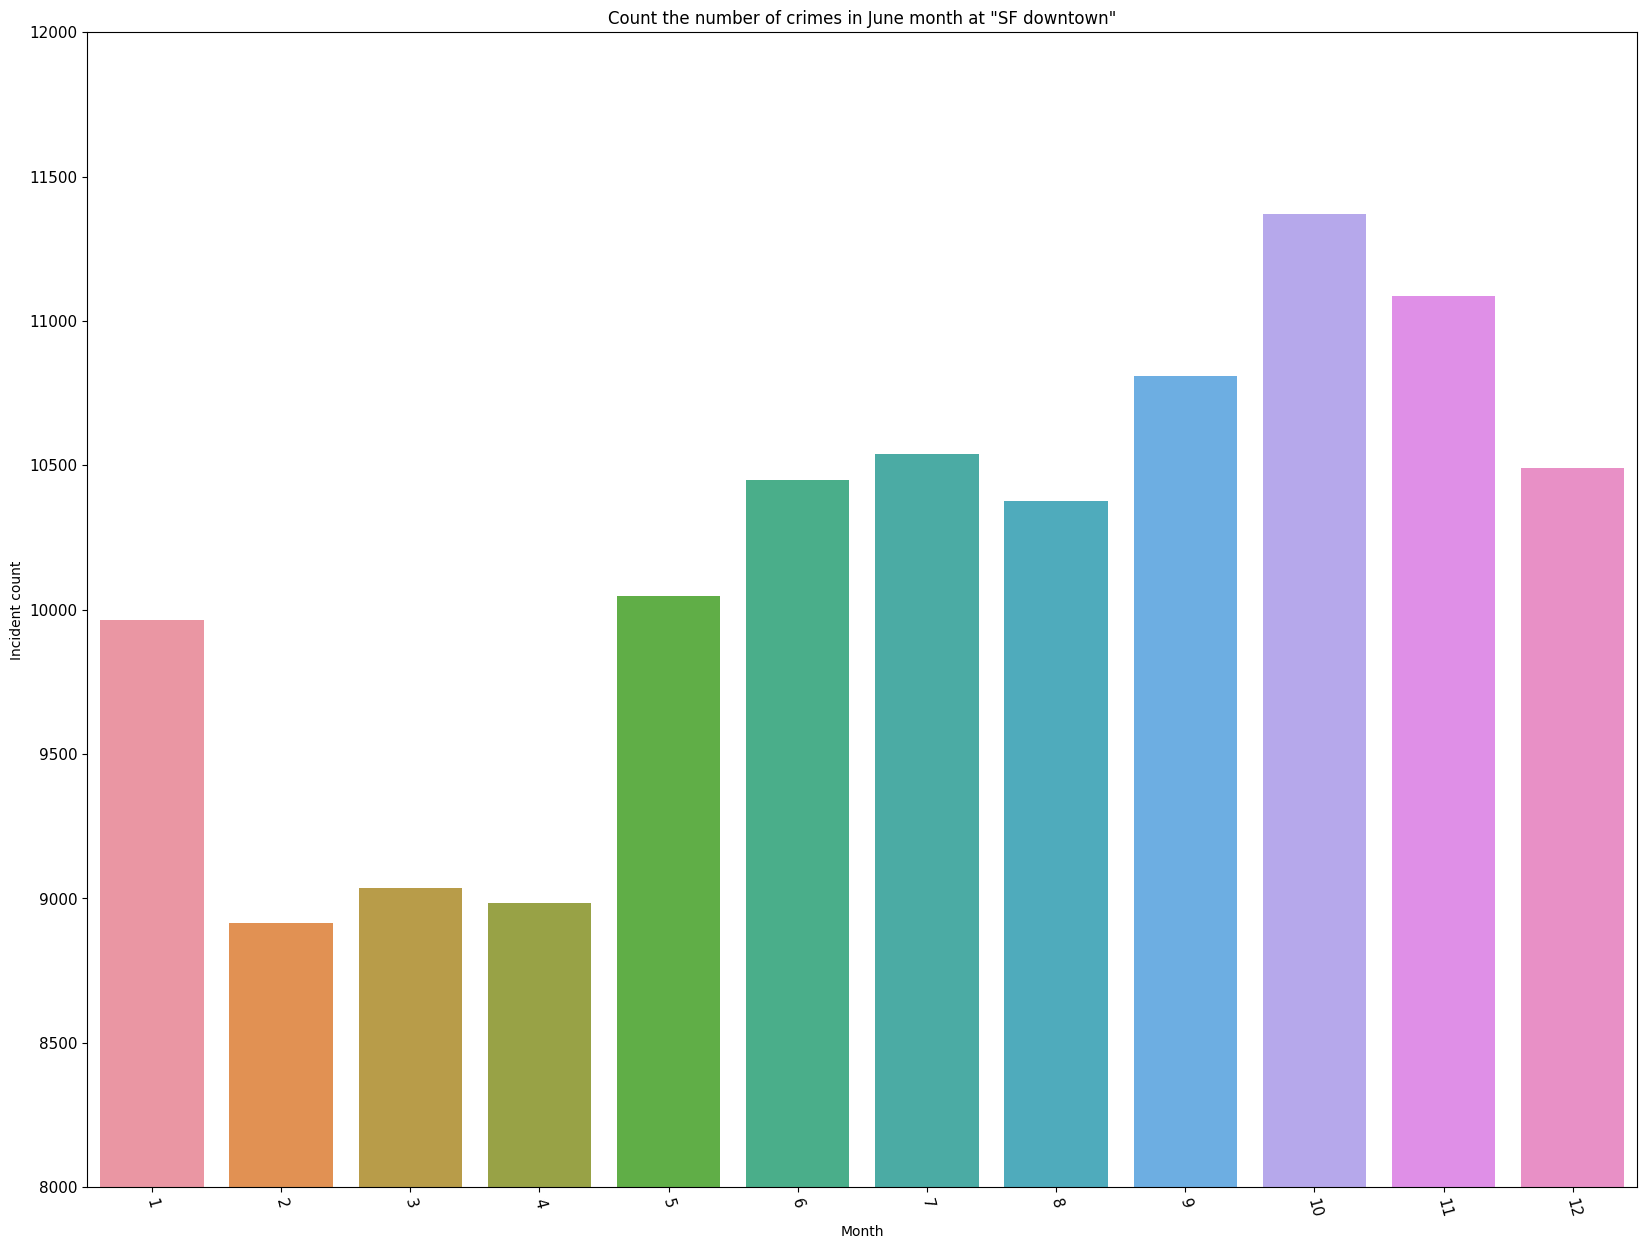

In [33]:
year_data = data[(data['Year'] == 2021)].groupby(['Month']).agg({'Incident_Num':['count']})
year_data.columns = ['Inc_count']
year_data = year_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Month',y='Inc_count',
                 data= year_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([8000,12000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

Summer and Fall are more prone to crimes.

### Most common category based on Time Of Day

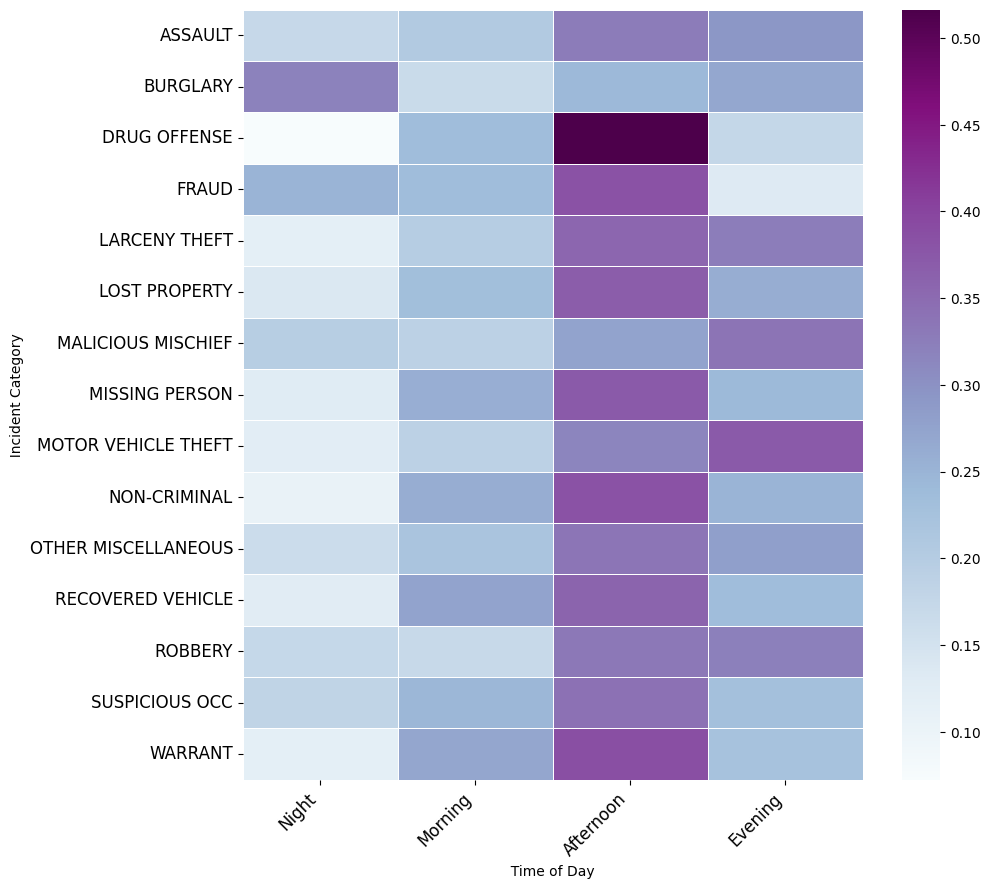

In [34]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['TimeOfDay']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Night', 
                                           'Morning', 'Afternoon', 
                                           'Evening']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Time of Day  ")
plt.ylabel("  Incident Category  ")
plt.show();

Most of the crimes are happening during Afternoon and few are in the Evening hours.

### Most common category based on Season of the Year

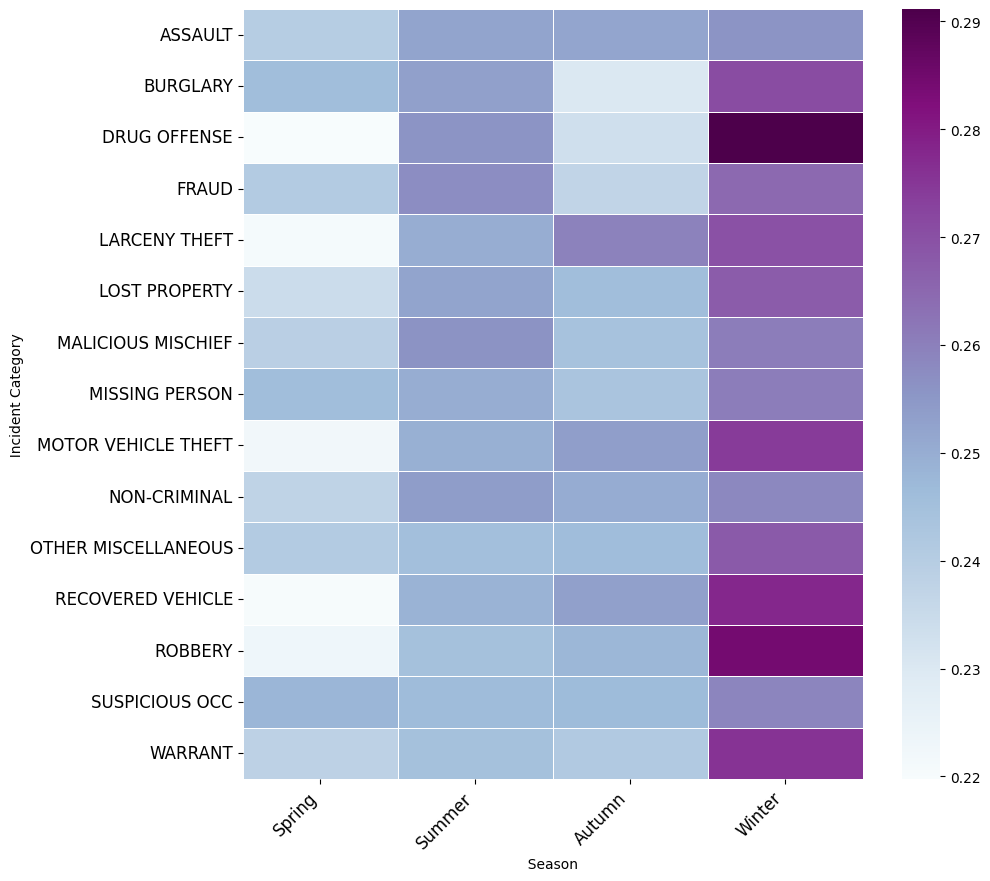

In [35]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['SeasonOfYear']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Spring', 
                                           'Summer', 'Autumn', 
                                           'Winter']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Season  ")
plt.ylabel("  Incident Category  ")
plt.show();

The crime activities has been shifted to Winter season.

## Feature Engineering

#### Converting the text to numerical values for the required features

In [36]:
j=0
for i in data['Police_Dist'].sort_values().unique():
    j +=1
    print("'" + str(i) +"':" + str(j) + ",")

'Bayview':1,
'Central':2,
'Ingleside':3,
'Mission':4,
'Northern':5,
'Out of SF':6,
'Park':7,
'Richmond':8,
'Southern':9,
'Taraval':10,
'Tenderloin':11,


In [37]:
dayofweek_replace={'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
season_replace = {'Spring':1,'Summer':2,'Autumn':3,'Winter':4}
timeofday_replace={'Night':1,'Morning':2,'Afternoon':3,'Evening':4}
policedst_replace={'Bayview':1,'Central':2,'Ingleside':3,'Mission':4,'Northern':5,
'Out of SF':6,'Park':7,'Richmond':8,'Southern':9,'Taraval':10,'Tenderloin':11}

In [38]:
category_replace = {'ARSON':1,
'ASSAULT':2,
'BURGLARY':3,
'CASE CLOSURE':4,
'CIVIL SIDEWALKS':5,
'COURTESY REPORT':6,
'DISORDERLY CONDUCT':7,
'DRUG OFFENSE':8,
'DRUG VIOLATION':9,
'EMBEZZLEMENT':10,
'FIRE REPORT':11,
'FORGERY AND COUNTERFEITING':12,
'FRAUD':13,
'GAMBLING':14,
'HOMICIDE':15,
'HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS':16,
'HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE':17,
'HUMAN TRAFFICKING, COMMERCIAL SEX ACTS':18,
'LARCENY THEFT':19,
'LIQUOR LAWS':20,
'LOST PROPERTY':21,
'MALICIOUS MISCHIEF':22,
'MISCELLANEOUS INVESTIGATION':23,
'MISSING PERSON':24,
'MOTOR VEHICLE THEFT':25,
'MOTOR VEHICLE THEFT?':26,
'NAN':27,
'NON-CRIMINAL':28,
'OFFENCES AGAINST THE FAMILY AND CHILDREN':29,
'OTHER':30,
'OTHER MISCELLANEOUS':31,
'OTHER OFFENSES':32,
'PROSTITUTION':33,
'RAPE':34,
'RECOVERED VEHICLE':35,
'ROBBERY':36,
'SEX OFFENSE':37,
'STOLEN PROPERTY':38,
'SUICIDE':39,
'SUSPICIOUS':40,
'SUSPICIOUS OCC':41,
'TRAFFIC COLLISION':42,
'TRAFFIC VIOLATION ARREST':43,
'VANDALISM':44,
'VEHICLE IMPOUNDED':45,
'VEHICLE MISPLACED':46,
'WARRANT':47,
'WEAPONS CARRYING ETC':48,
'WEAPONS OFFENCE':49,
'WEAPONS OFFENSE':50}

#### Replace the values of the features from text to numerical values

In [39]:
data['DayOfWeek'] = data['DayOfWeek'].map(dayofweek_replace)
data['SeasonOfYear'] = data['SeasonOfYear'].map(season_replace)
data['TimeOfDay'] = data['TimeOfDay'].map(timeofday_replace)
data['Incident_Cat'] = data['Incident_Cat'].map(category_replace)
data['Police_Dist'] = data['Police_Dist'].map(policedst_replace)

In [40]:
data.dtypes

Incident_Datetime          datetime64[ns]
Report_Datetime                    object
Report Type Code                   object
Report Type Description            object
Filed Online                       object
Incident_Date                      object
Incident_Time                      object
Incident_Year                       int64
DayOfWeek                           int64
Incident_Num                        int64
Incident_Code                       int64
Incident_Cat                        int64
Incident_Desc                      object
Incident Subcategory               object
Address                            object
Police_Dist                         int64
Resolution                         object
Analysis_Neigh                     object
Neighborhoods                     float64
Central_Mar_Ten_Boun              float64
Civic_Cen_Har_Red                 float64
Cur_Pol_Dist                      float64
Cur_Sup_Dist                      float64
HSOC_Zones                        

In [41]:
data.isnull().sum()

Incident_Datetime               0
Report_Datetime                 0
Report Type Code                0
Report Type Description         0
Filed Online               548985
Incident_Date                   0
Incident_Time                   0
Incident_Year                   0
DayOfWeek                       0
Incident_Num                    0
Incident_Code                   0
Incident_Cat                    0
Incident_Desc                   0
Incident Subcategory          570
Address                         0
Police_Dist                     0
Resolution                      0
Analysis_Neigh                  0
Neighborhoods                   0
Central_Mar_Ten_Boun            0
Civic_Cen_Har_Red               0
Cur_Pol_Dist                    0
Cur_Sup_Dist                    0
HSOC_Zones                      0
Latitude                        0
Longitude                       0
Year                            0
Month                           0
Day                             0
Hour          

### Required Data for analysis and model design

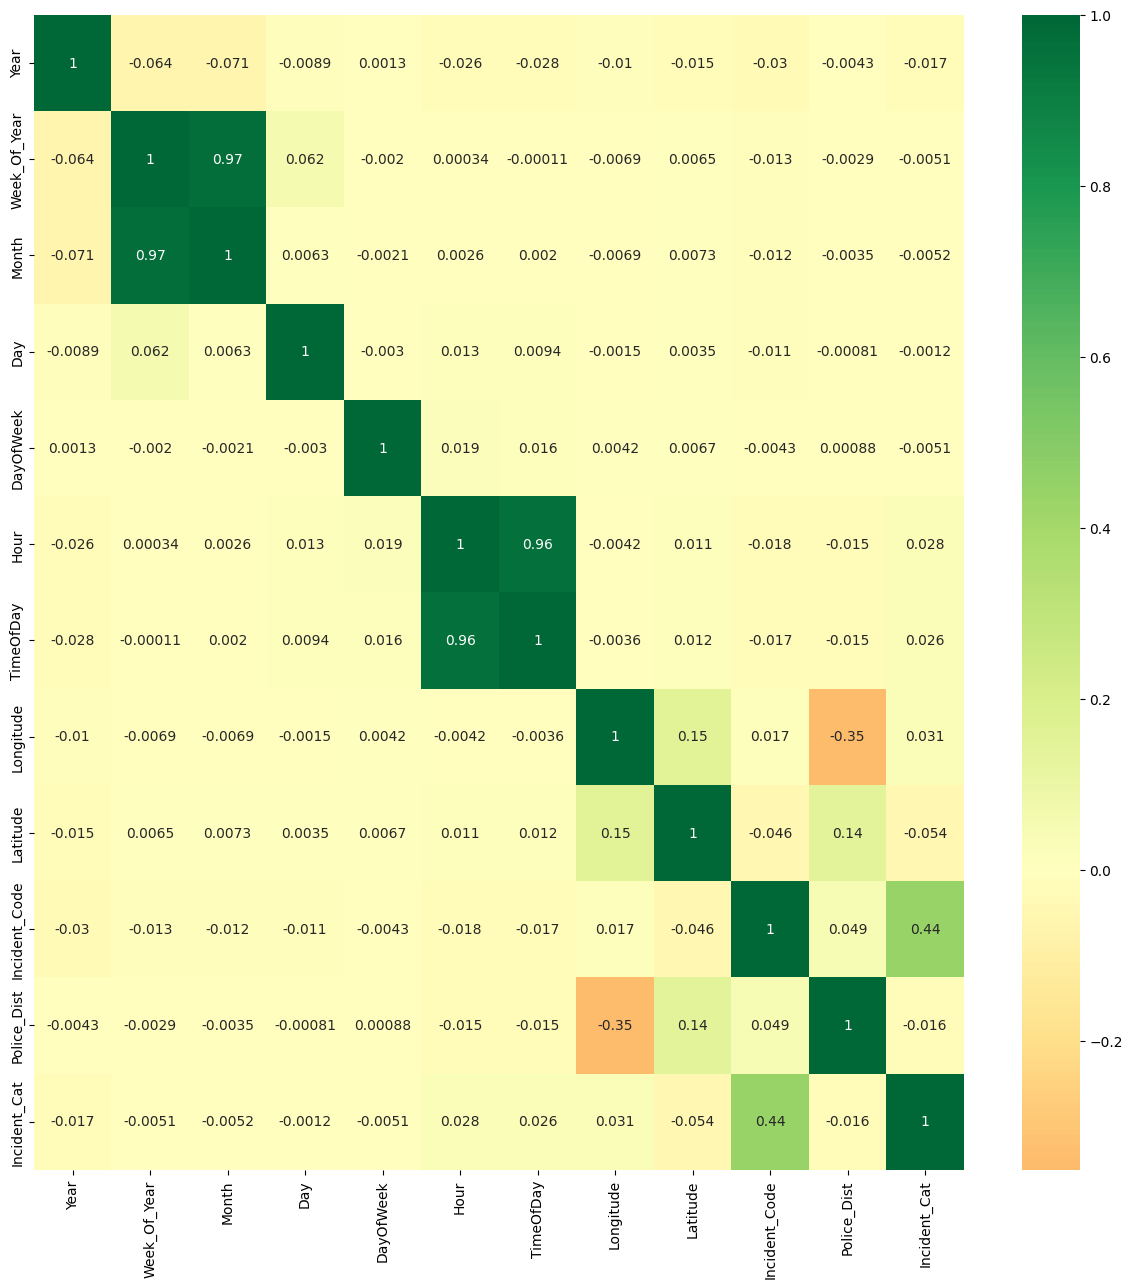

In [42]:
X = data[['Year','Week_Of_Year','Month','Day','DayOfWeek','Hour','TimeOfDay','Longitude','Latitude',
         'Incident_Code','Police_Dist','Incident_Cat']]
plt.figure(figsize=(15,15))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',center=0) 
plt.show();

These attributes are highly correlated.

### Prepare the data for Train and Test

In [43]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y=X['Incident_Cat']
X.drop(columns=['Incident_Cat'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sample Train Data

In [44]:
X.head()

Year  Week_Of_Year  Month  Day  DayOfWeek  Hour  TimeOfDay   Longitude  \
25  2021            19      5   15          7    13          3 -122.433624   
26  2021            19      5   15          7    17          3 -122.422007   
27  2021            19      5   15          7     3          1 -122.447497   
28  2021            19      5   15          7    10          2 -122.434027   
29  2021            19      5   15          7    16          3 -122.391268   

     Latitude  Incident_Code  Police_Dist  
25  37.726236          75000            3  
26  37.805497           9320            2  
27  37.772790          65010            7  
28  37.789837          27195            5  
29  37.739853          16710            1

## Random Forest

Random forest with entropy is giving better accuracy

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

randomforest = RandomForestClassifier(criterion="entropy",random_state=0,max_depth = 10, n_estimators=50)

e_model = randomforest.fit(X_train, y_train)

y_pred = e_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8927732374851911


There are 37 classes

In [46]:
class_names = [
    'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
    'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16','Class 17','Class 18','Class 19','Class 20',
    'Class 21','Class 22','Class 23','Class 24','Class 25','Class 26','Class 27','Class 28','Class 29','Class 30',
    'Class 31','Class 32','Class 33','Class 34','Class 35','Class 36','Class 37','Class 38','Class 39','Class 40',
    'Class 41','Class 42','Class 43','Class 44','Class 45','Class 46','Class 47','Class 48','Class 49','Class 50']

Function to draw confusion Matrix

In [47]:
def con_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    classnames = class_names
    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(35, 30))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(classnames, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(classnames, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title(f'The model {model_name} Confusion Matrix', fontsize=20)

    plt.show();

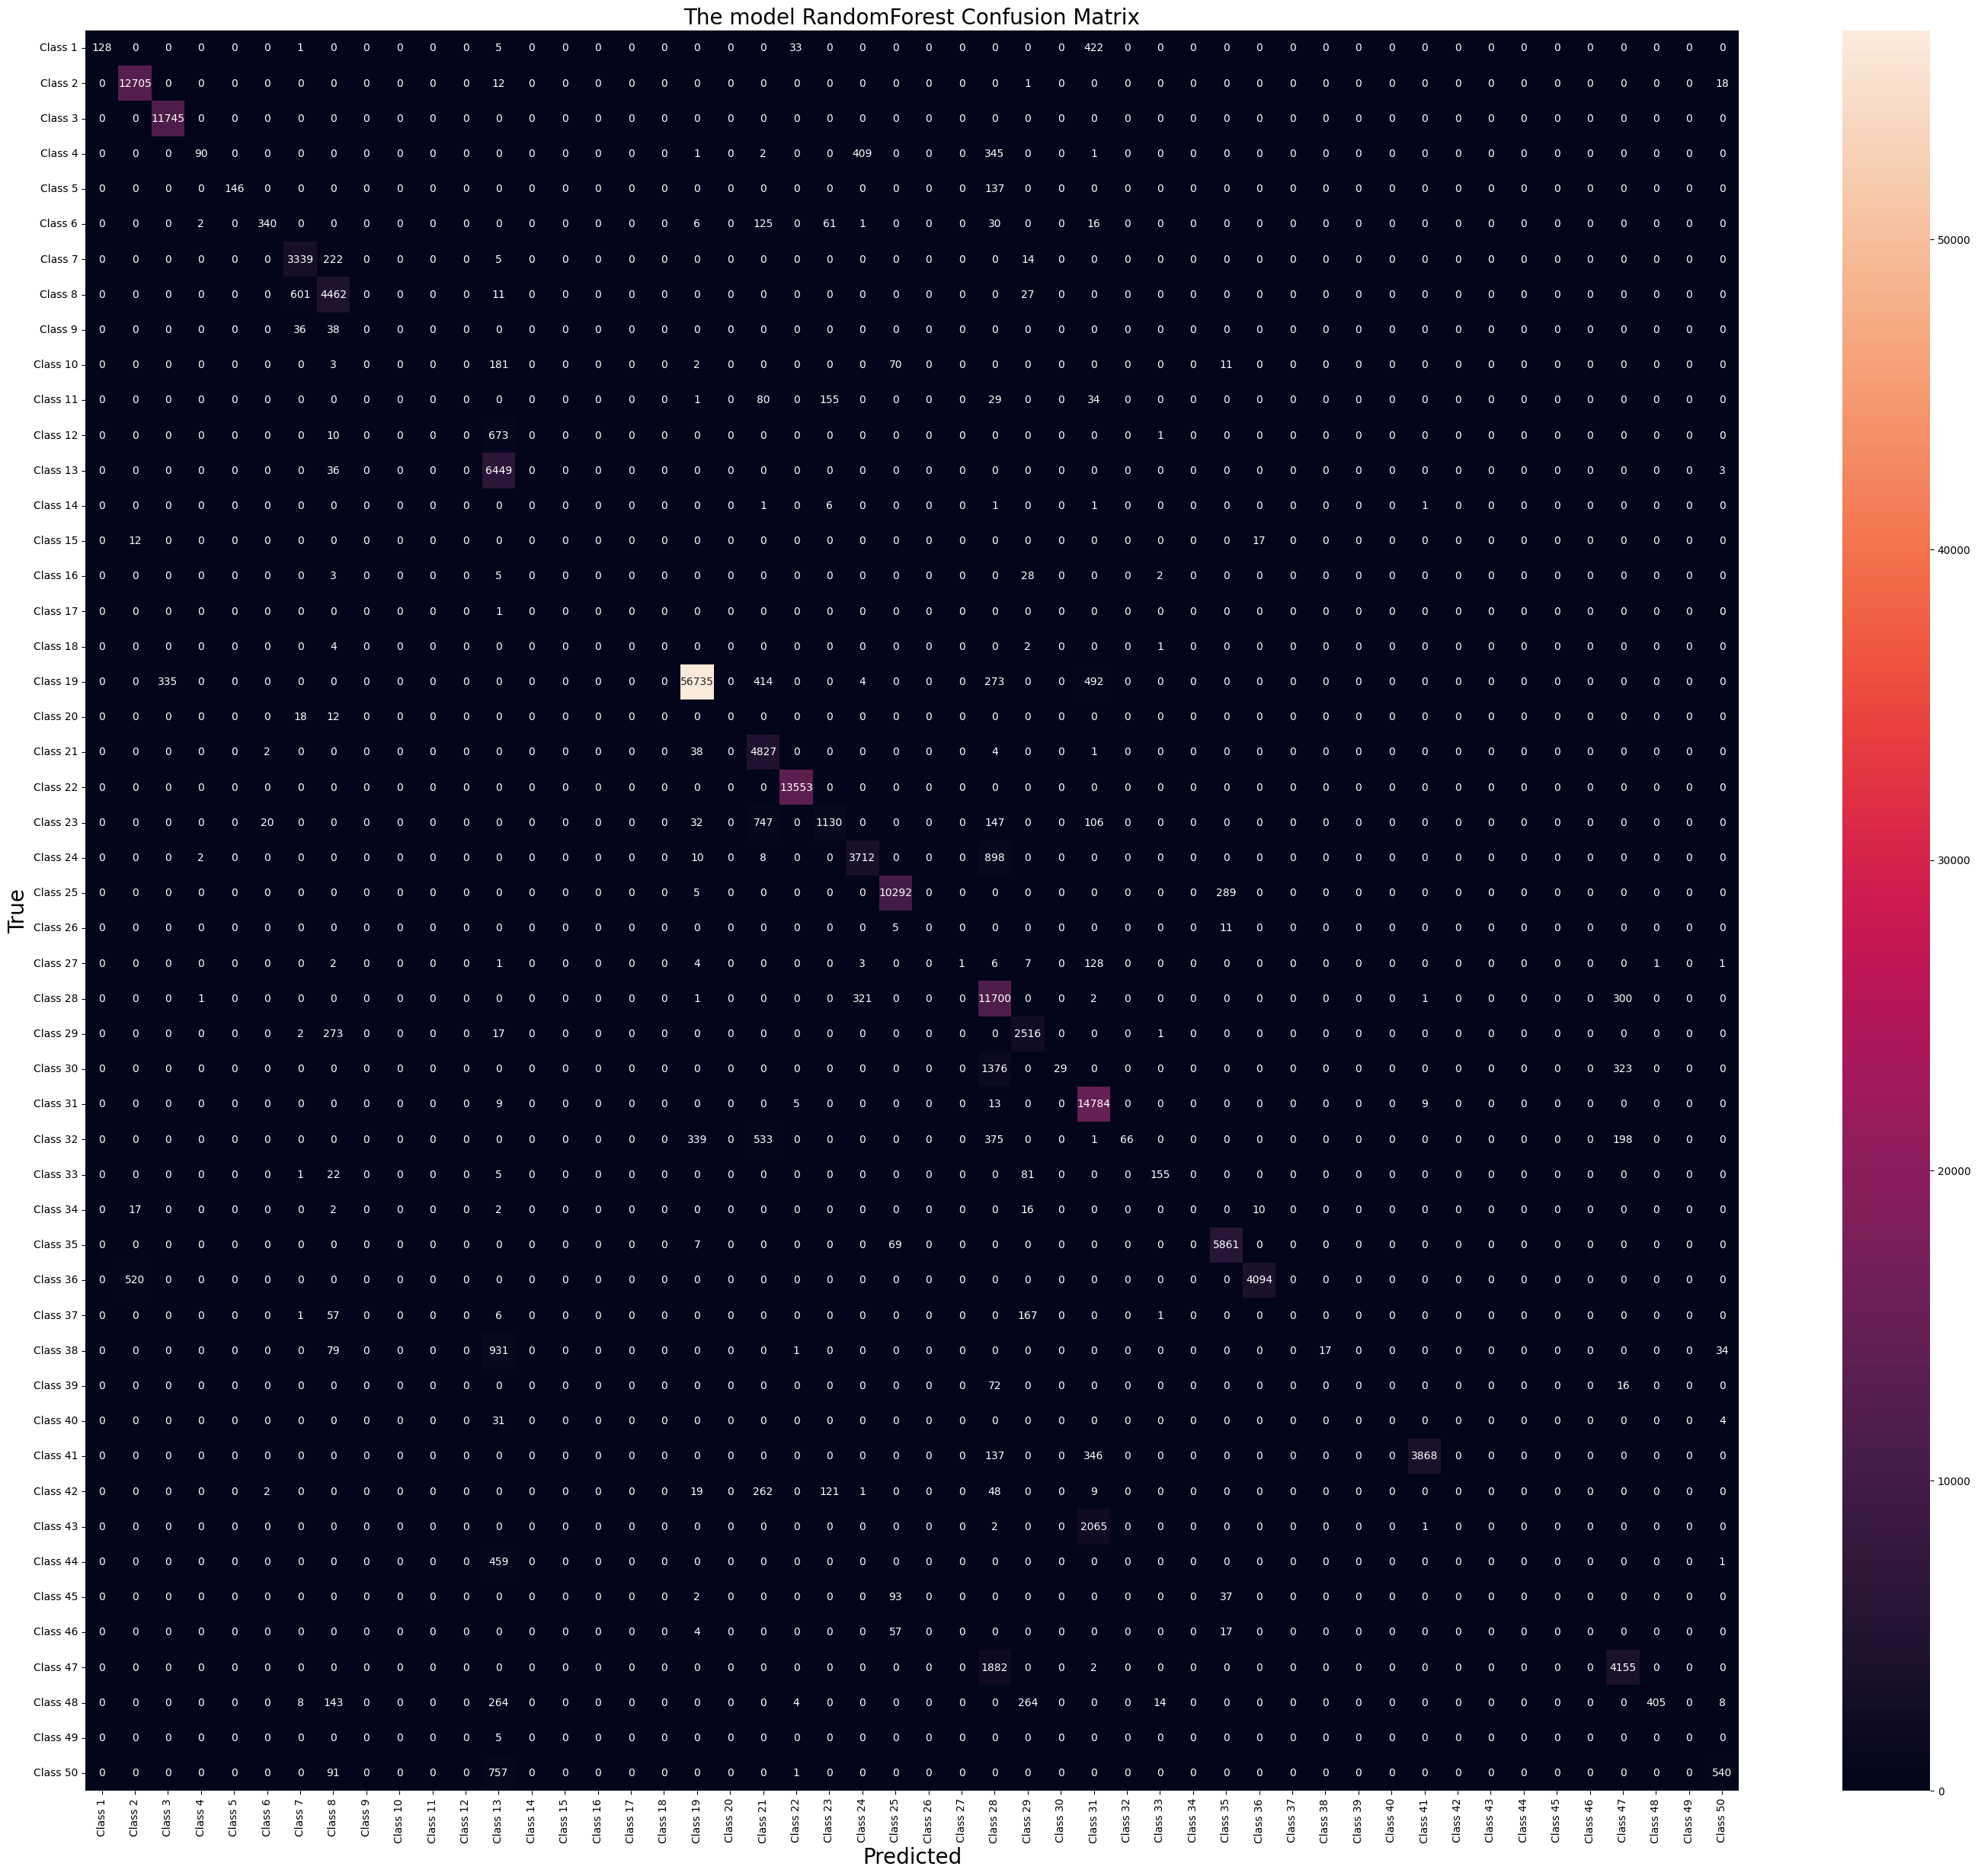

In [48]:
con_matrix(y_test, y_pred,"RandomForest")

In [49]:
print("\n\tClassificatin report for Randomforest\n\n",classification_report(y_test,y_pred, target_names=class_names))


	Classificatin report for Randomforest

               precision    recall  f1-score   support

     Class 1       1.00      0.22      0.36       589
     Class 2       0.96      1.00      0.98     12736
     Class 3       0.97      1.00      0.99     11745
     Class 4       0.95      0.11      0.19       848
     Class 5       1.00      0.52      0.68       283
     Class 6       0.93      0.59      0.72       581
     Class 7       0.83      0.93      0.88      3580
     Class 8       0.82      0.87      0.85      5101
     Class 9       0.00      0.00      0.00        74
    Class 10       0.00      0.00      0.00       267
    Class 11       0.00      0.00      0.00       299
    Class 12       0.00      0.00      0.00       684
    Class 13       0.66      0.99      0.79      6488
    Class 14       0.00      0.00      0.00        10
    Class 15       0.00      0.00      0.00        29
    Class 16       0.00      0.00      0.00        38
    Class 17       0.00      0.00      

### K Neighbors Classification

Number of neighbors values near to 100 giving a very good accuracy.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors = KNeighborsClassifier(n_neighbors=100)

k_model = KNeighbors.fit(X_train, y_train)

y_pred = k_model.predict(X_test)
print("KNeighbors Accuracy : ",accuracy_score(y_test,y_pred))

KNeighbors Accuracy :  0.9859791972048754


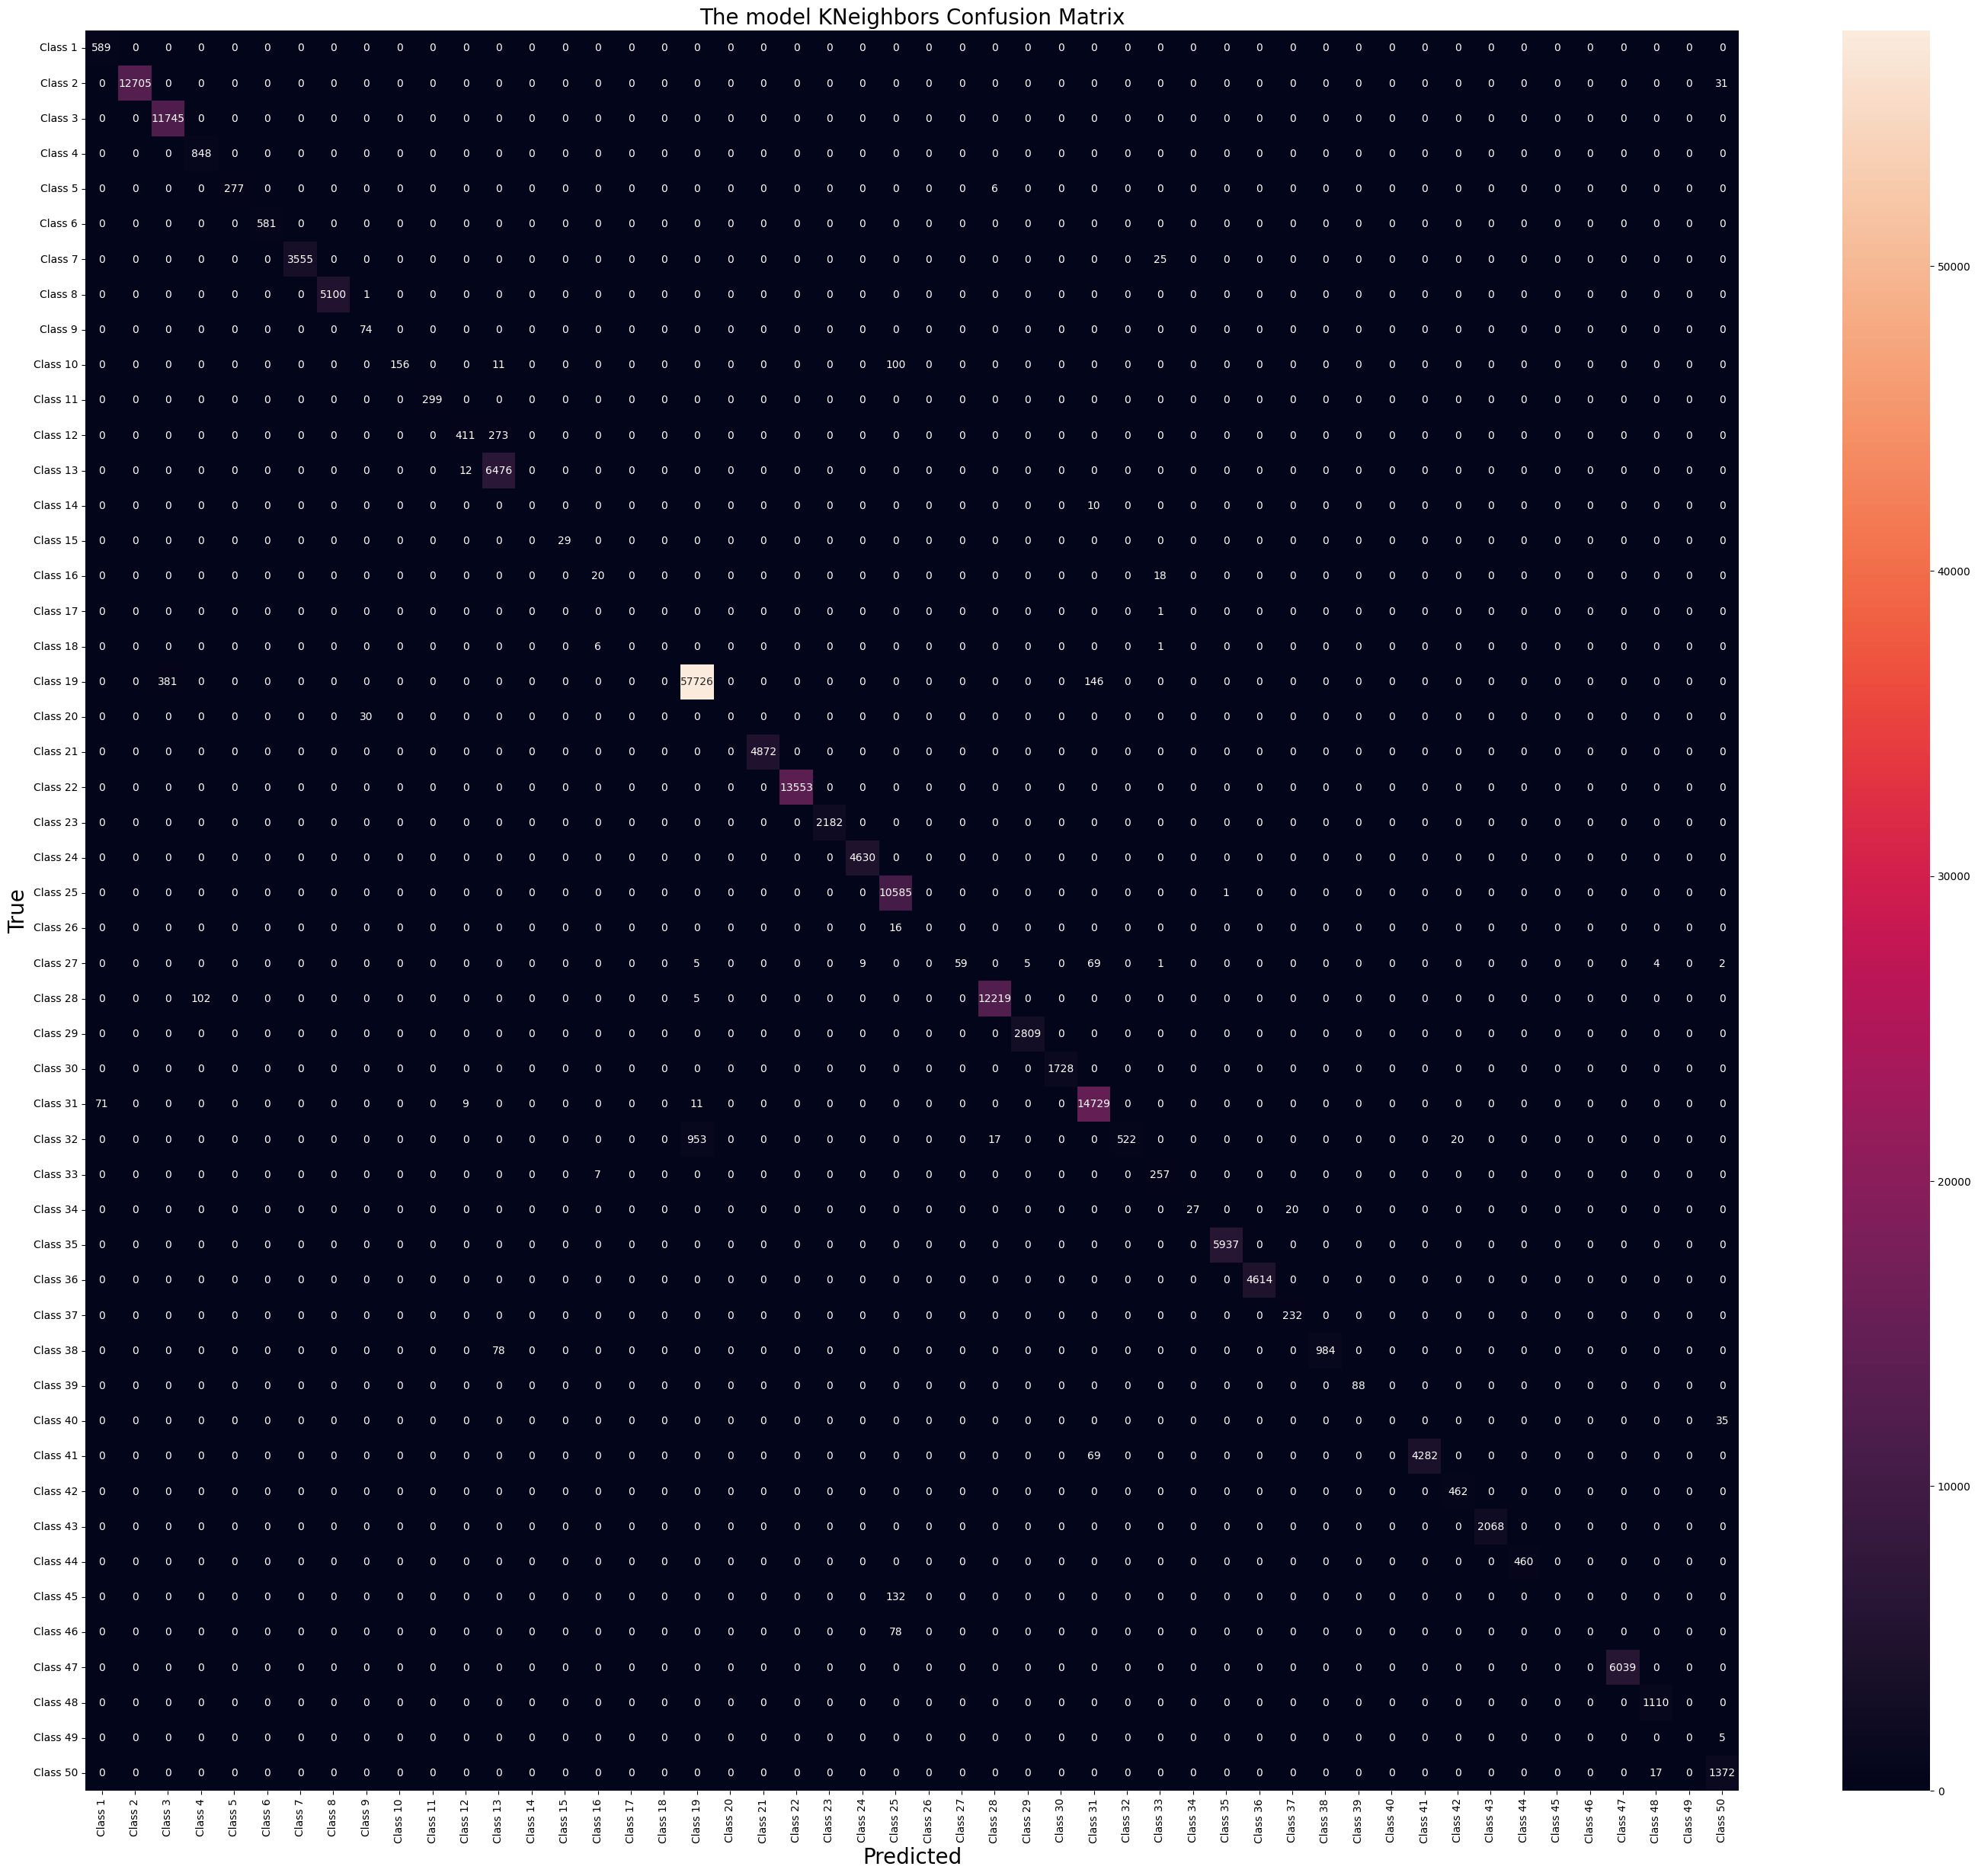

In [51]:
con_matrix(y_test, y_pred,"KNeighbors")

In [52]:
print("\n\tClassificatin report for KNeighbors\n\n",classification_report(y_test,y_pred, target_names=class_names))


	Classificatin report for KNeighbors

               precision    recall  f1-score   support

     Class 1       0.89      1.00      0.94       589
     Class 2       1.00      1.00      1.00     12736
     Class 3       0.97      1.00      0.98     11745
     Class 4       0.89      1.00      0.94       848
     Class 5       1.00      0.98      0.99       283
     Class 6       1.00      1.00      1.00       581
     Class 7       1.00      0.99      1.00      3580
     Class 8       1.00      1.00      1.00      5101
     Class 9       0.70      1.00      0.83        74
    Class 10       1.00      0.58      0.74       267
    Class 11       1.00      1.00      1.00       299
    Class 12       0.95      0.60      0.74       684
    Class 13       0.95      1.00      0.97      6488
    Class 14       0.00      0.00      0.00        10
    Class 15       1.00      1.00      1.00        29
    Class 16       0.61      0.53      0.56        38
    Class 17       0.00      0.00      0.

## Artificial Neural Network

In [53]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

Function to plot the history chart based on epochs

In [54]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show();

Use Standard scalar to fit the given data and convert the y (target) values into categorical format

In [55]:
sc = StandardScaler()
AX_train = pd.DataFrame(sc.fit_transform(X_train))
AX_test = pd.DataFrame(sc.fit_transform(X_test))
Ay_train = to_categorical(y_train)
Ay_test = to_categorical(y_test)

The input shape is 11 based on the number of attributes and output is number of classes.

In [56]:
ann_model = Sequential()
ann_model.add(Dense(121, input_shape = (11,), activation = "relu"))
ann_model.add(Dense(76, activation = "relu"))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(51, activation = "softmax"))
ann_model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 121)               1452      
                                                                 
 dense_1 (Dense)             (None, 76)                9272      
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense_2 (Dense)             (None, 51)                3927      
                                                                 
Total params: 14,651
Trainable params: 14,651
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = ann_model.fit(AX_train, Ay_train, verbose=1, epochs=10)

Epoch 1/10
14526/14526 [==============================] - 57s 4ms/step - loss: 0.8707 - accuracy: 0.6797
Epoch 2/10
14526/14526 [==============================] - 50s 3ms/step - loss: 0.6351 - accuracy: 0.7661
Epoch 3/10
14526/14526 [==============================] - 51s 4ms/step - loss: 0.6184 - accuracy: 0.7808
Epoch 4/10
14526/14526 [==============================] - 51s 4ms/step - loss: 0.6151 - accuracy: 0.7816
Epoch 5/10
14526/14526 [==============================] - 50s 3ms/step - loss: 0.5804 - accuracy: 0.7934
Epoch 6/10
14526/14526 [==============================] - 51s 3ms/step - loss: 0.5612 - accuracy: 0.7990
Epoch 7/10
14526/14526 [==============================] - 50s 3ms/step - loss: 0.5629 - accuracy: 0.7973
Epoch 8/10
14526/14526 [==============================] - 50s 3ms/step - loss: 0.5573 - accuracy: 0.8001
Epoch 9/10
14526/14526 [==============================] - 51s 3ms/step - loss: 0.5611 - accuracy: 0.8011
Epoch 10/10
14526/14526 [==============================

In [58]:
Ay_pred=ann_model.predict(AX_test) 
Ay_pred_class=np.argmax(Ay_pred,axis=1)
Ay_test_class = np.argmax(Ay_test, axis=1)

6226/6226 [==============================] - 9s 1ms/step


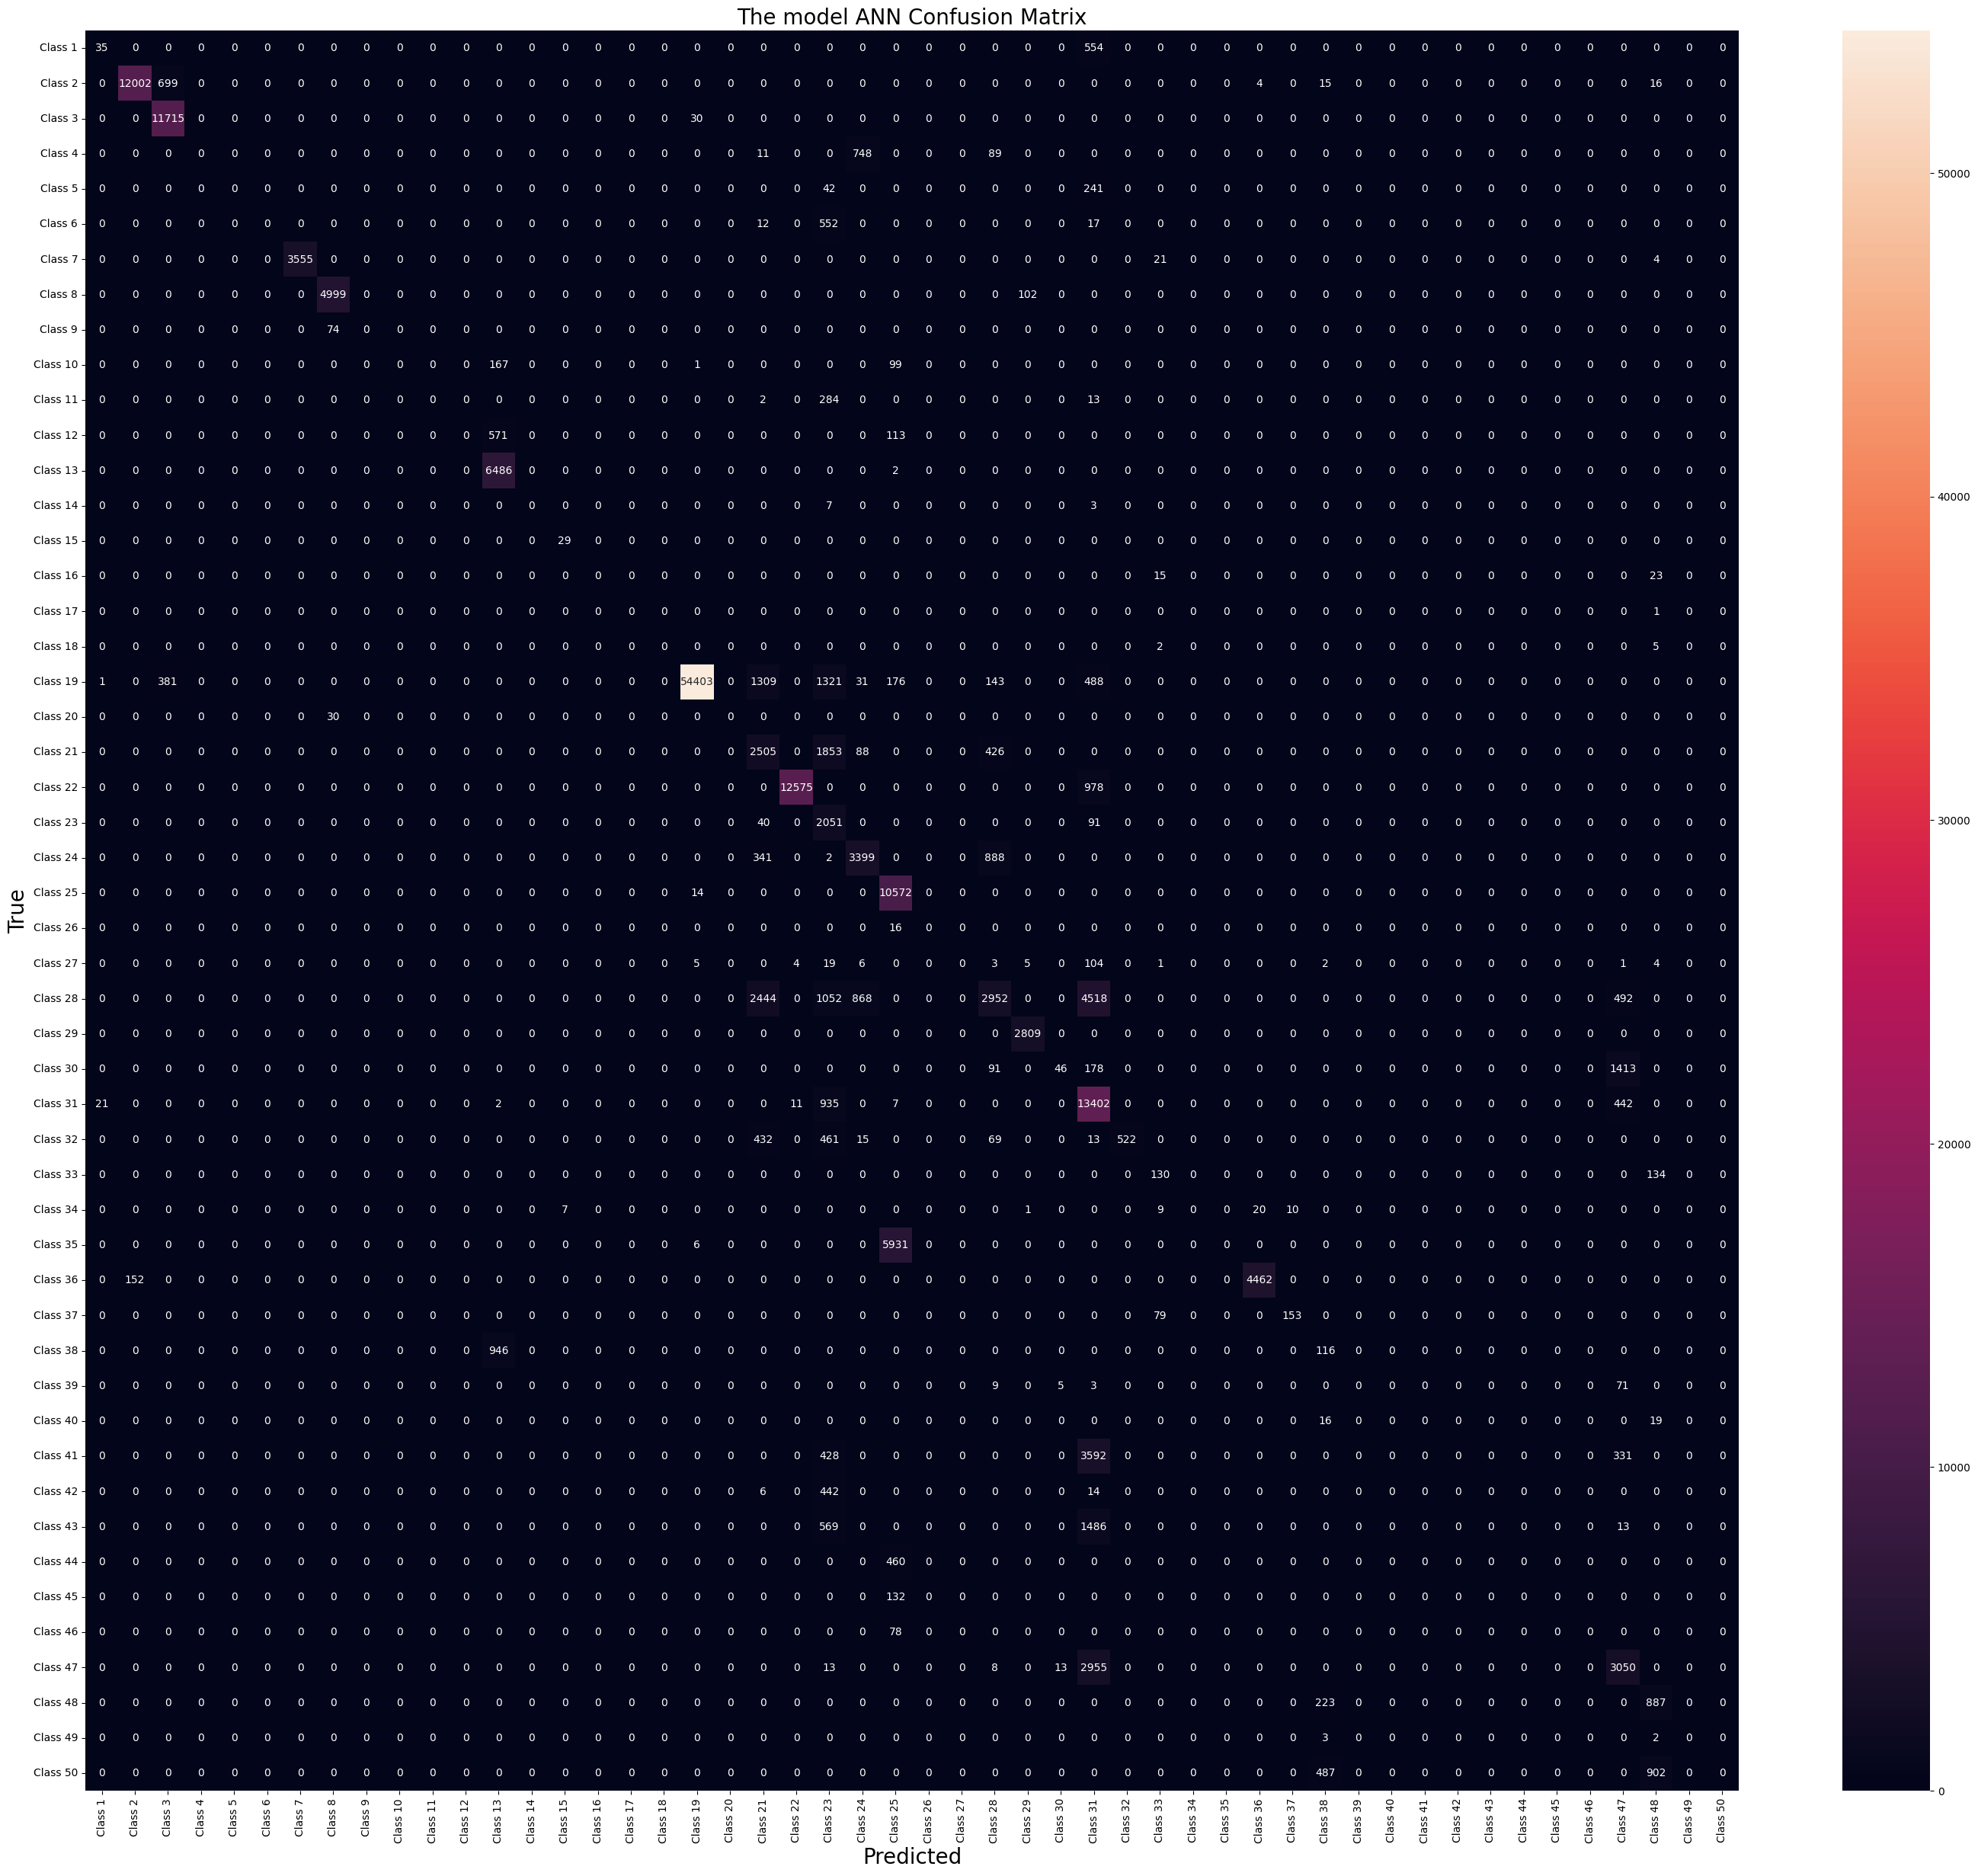

In [59]:
con_matrix(Ay_test_class, Ay_pred_class,"ANN")

In [60]:
print(classification_report(Ay_test_class, Ay_pred_class))

              precision    recall  f1-score   support

           1       0.61      0.06      0.11       589
           2       0.99      0.94      0.96     12736
           3       0.92      1.00      0.95     11745
           4       0.00      0.00      0.00       848
           5       0.00      0.00      0.00       283
           6       0.00      0.00      0.00       581
           7       1.00      0.99      1.00      3580
           8       0.98      0.98      0.98      5101
           9       0.00      0.00      0.00        74
          10       0.00      0.00      0.00       267
          11       0.00      0.00      0.00       299
          12       0.00      0.00      0.00       684
          13       0.79      1.00      0.88      6488
          14       0.00      0.00      0.00        10
          15       0.81      1.00      0.89        29
          16       0.00      0.00      0.00        38
          17       0.00      0.00      0.00         1
          18       0.00    

In [61]:
scores = ann_model.evaluate(AX_test, Ay_test, verbose=0)
print('Test data loss:', scores[0])
print('Test accuracy:', scores[1])

Test data loss: 0.6770702600479126
Test accuracy: 0.7673289775848389


##TabNet

In [62]:
!pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 474.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 whi

In [63]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [64]:
n_total = len(X_train)

train_indices, valid_indices = train_test_split(
    range(n_total), test_size=0.3, random_state=0)

In [65]:
nt_total = len(X_test)
test_indices = [i for i in range(nt_total)]

In [66]:
TX_train = X_train.values[train_indices]
Ty_train = y_train.values[train_indices]

TX_valid = X_train.values[valid_indices]
Ty_valid = y_train.values[valid_indices]

TX_test = X_test.values[test_indices]
Ty_test = y_test.values[test_indices]

The learning rate is initially set to, lr = 0.020

After 20 epochs, a decay rate of 0.95 will be applied

The result is simply the product of our learning rate and decay rate 0.02*0.95
In the next block of code, we fit the model to our data. Basically it says the train and validation sets will be evaluated for a total of 30 iterations (epochs).

The patience parameter states that if an improvement in metrics is not observed after 30 consecutive epochs, the model will stop running and the best weights from the best epoch will be loaded.

The batch size of 10000 was selected based on recommendations from TabNet’s paper, where they suggest a batch size of up to 10% of the total data. They also recommend that the virtual batch size is smaller than the batch size and can be evenly divided into the batch size.


In [67]:
clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

In [68]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)

clf.fit(
    X_train=TX_train, y_train=Ty_train,
    eval_set=[(TX_train, Ty_train), (TX_valid, Ty_valid)],
    eval_name=['train', 'valid'],
    max_epochs=40, patience=30,
    batch_size=10000, virtual_batch_size=1000,
    augmentations=aug
) 

epoch 0  | loss: 2.56073 | train_accuracy: 0.01587 | valid_accuracy: 0.01626 |  0:00:18s
epoch 1  | loss: 1.58545 | train_accuracy: 0.06524 | valid_accuracy: 0.06448 |  0:00:40s
epoch 2  | loss: 1.20511 | train_accuracy: 0.08348 | valid_accuracy: 0.08301 |  0:00:50s
epoch 3  | loss: 1.11163 | train_accuracy: 0.09543 | valid_accuracy: 0.09483 |  0:01:00s
epoch 4  | loss: 1.02973 | train_accuracy: 0.08641 | valid_accuracy: 0.08634 |  0:01:09s
epoch 5  | loss: 0.97811 | train_accuracy: 0.09638 | valid_accuracy: 0.0964  |  0:01:18s
epoch 6  | loss: 0.93516 | train_accuracy: 0.11812 | valid_accuracy: 0.11886 |  0:01:28s
epoch 7  | loss: 0.91275 | train_accuracy: 0.30557 | valid_accuracy: 0.3034  |  0:01:36s
epoch 8  | loss: 0.87041 | train_accuracy: 0.26352 | valid_accuracy: 0.26517 |  0:01:45s
epoch 9  | loss: 0.85128 | train_accuracy: 0.12872 | valid_accuracy: 0.12996 |  0:01:54s
epoch 10 | loss: 0.84563 | train_accuracy: 0.71822 | valid_accuracy: 0.71788 |  0:02:03s
epoch 11 | loss: 0.84

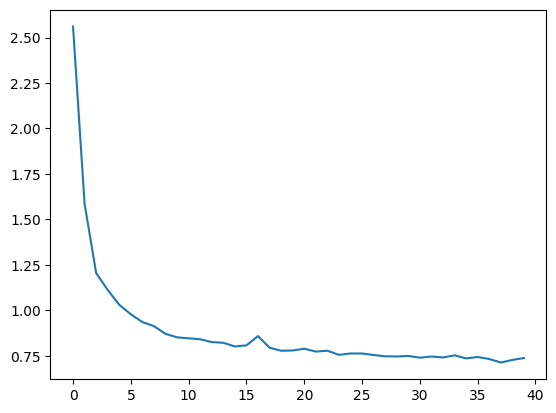

In [69]:
# plot losses
plt.plot(clf.history['loss'])

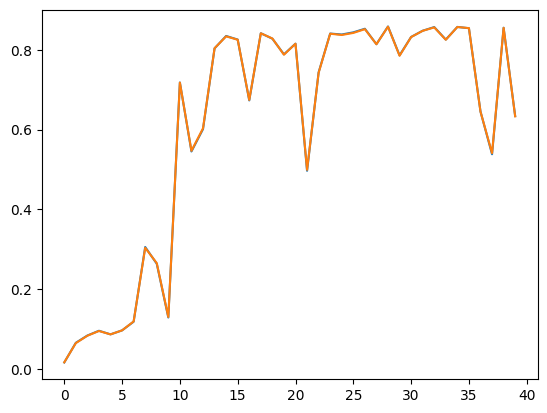

In [70]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

In [71]:
# or you can simply use the predict method

y_pred = clf.predict(TX_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=Ty_test)
print(f"FINAL TEST SCORE : {test_acc}")

FINAL TEST SCORE : 0.8567448444810345


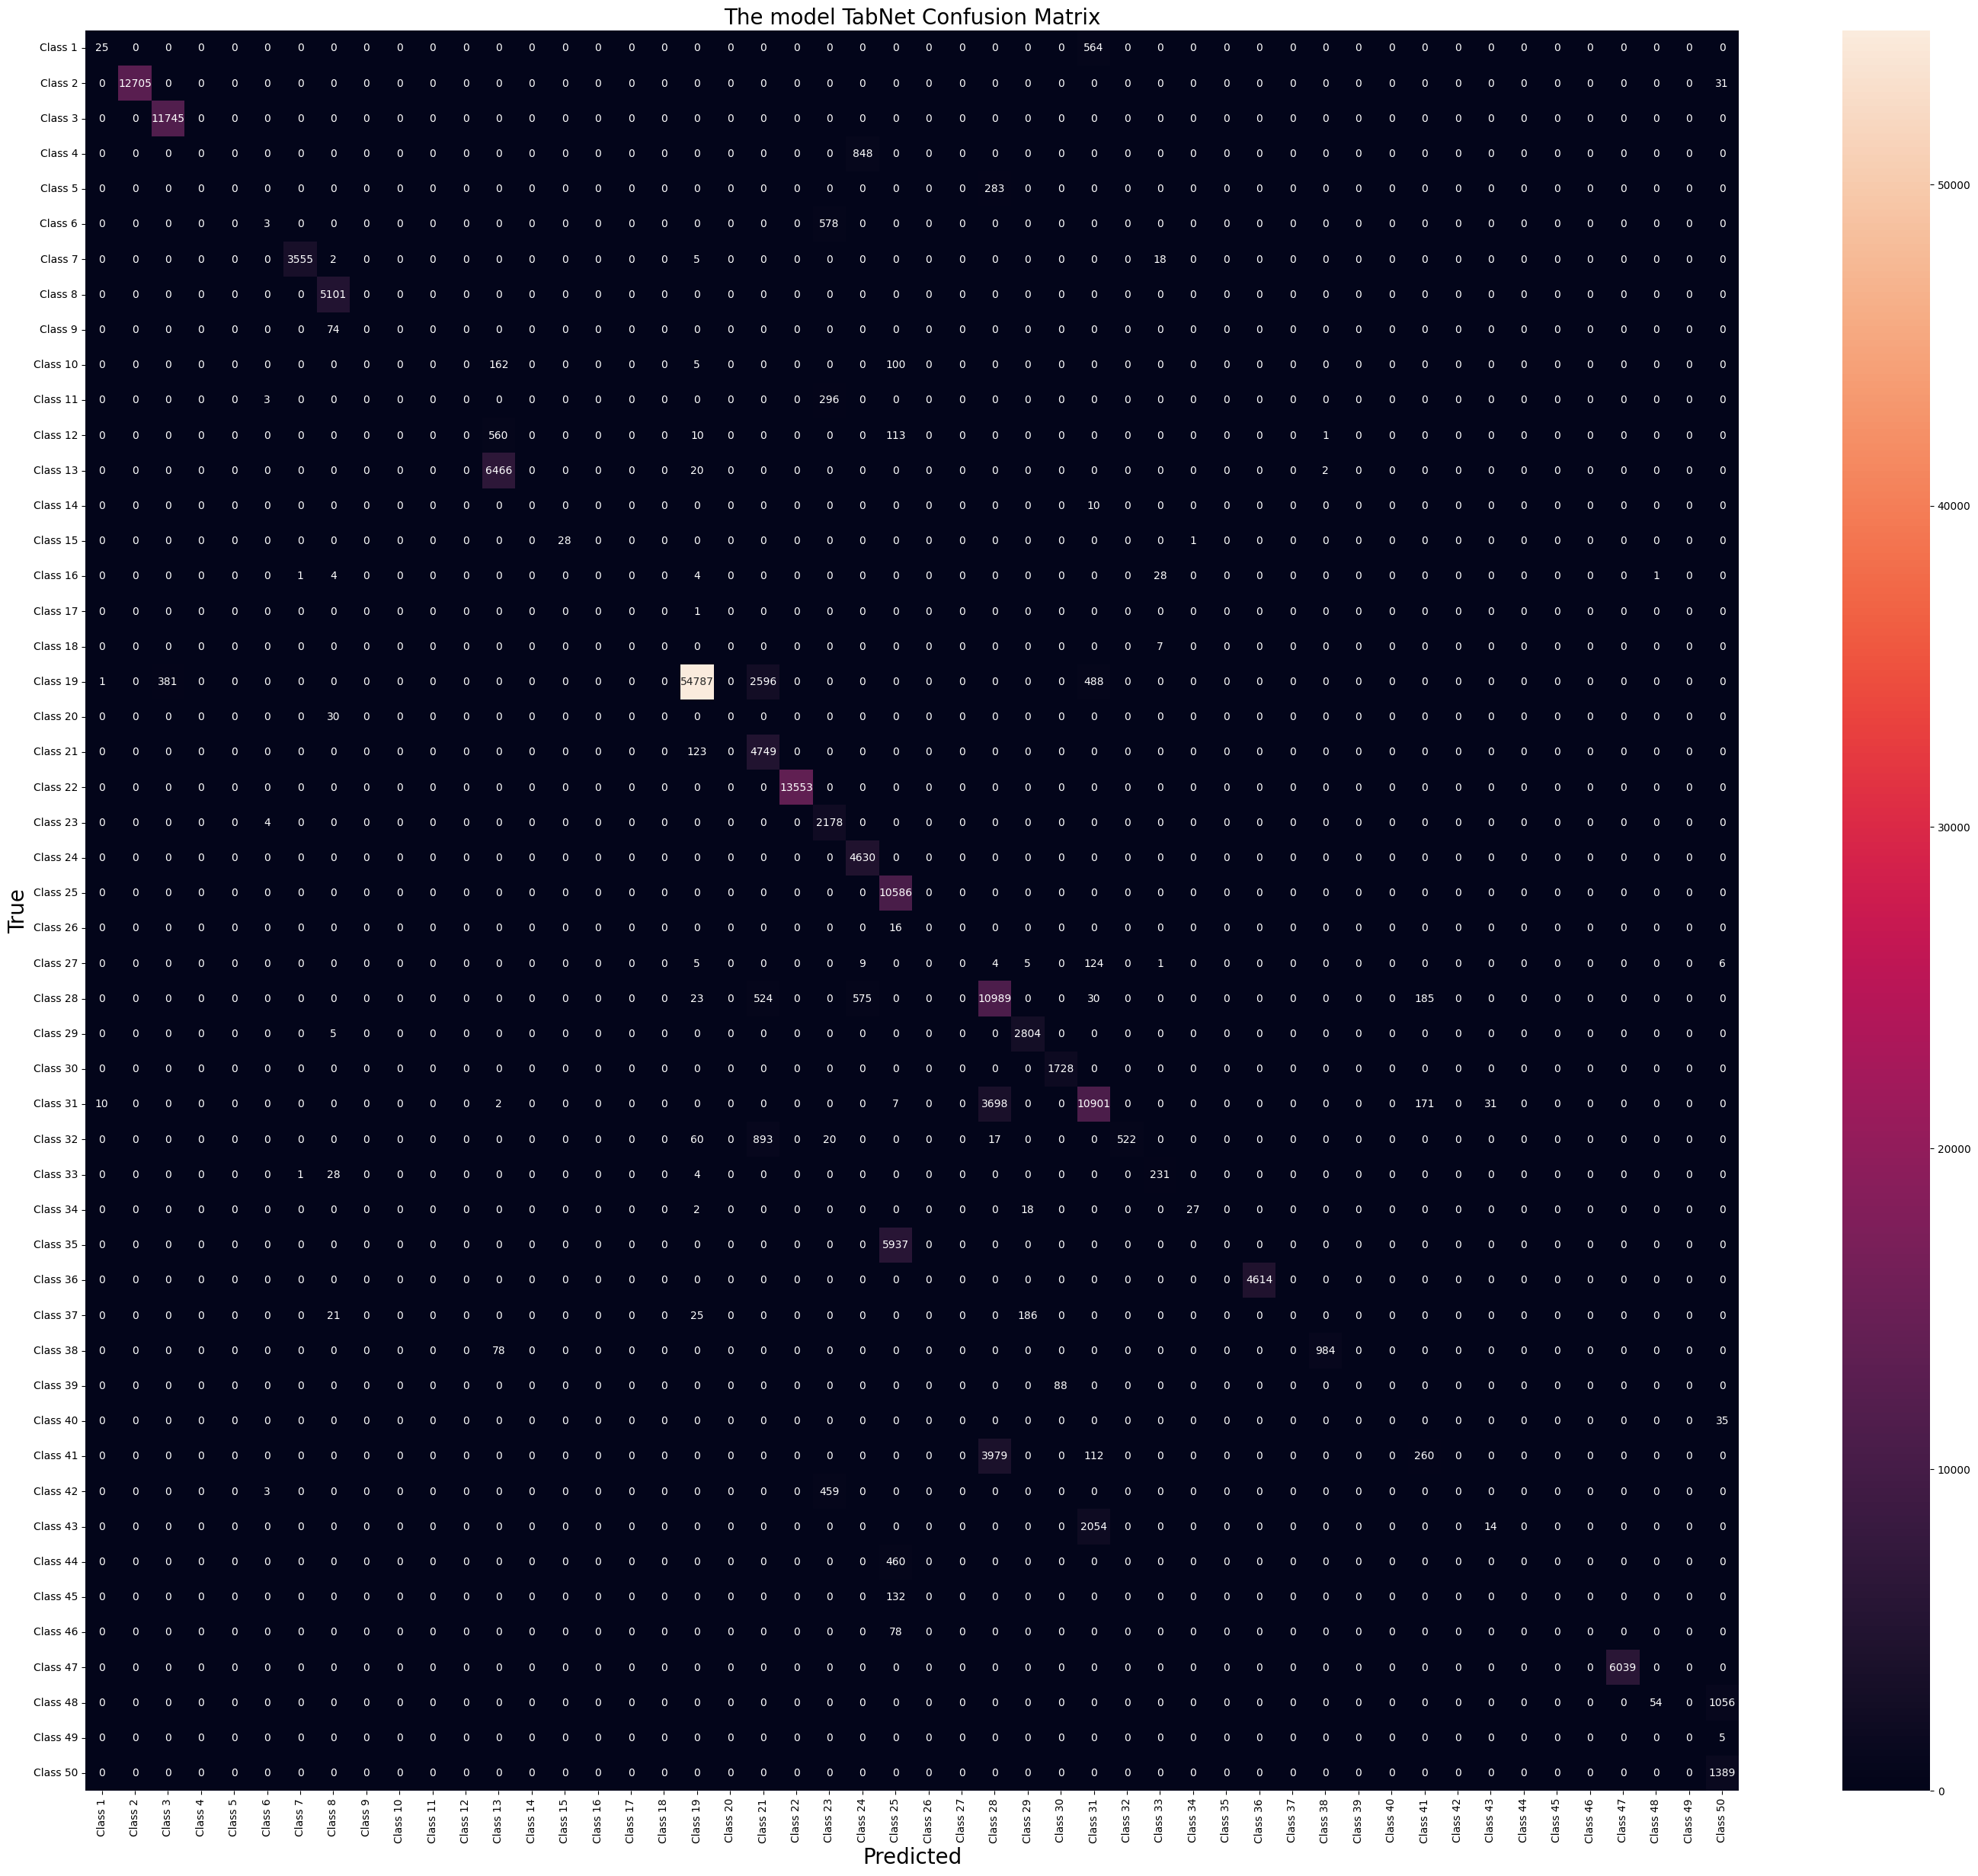

In [72]:
con_matrix(Ty_test, y_pred,"TabNet")

In [73]:
print("\n\tClassificatin report for TabNet\n\n",classification_report(Ty_test,y_pred, target_names=class_names))


	Classificatin report for TabNet

               precision    recall  f1-score   support

     Class 1       0.69      0.04      0.08       589
     Class 2       1.00      1.00      1.00     12736
     Class 3       0.97      1.00      0.98     11745
     Class 4       0.00      0.00      0.00       848
     Class 5       0.00      0.00      0.00       283
     Class 6       0.23      0.01      0.01       581
     Class 7       1.00      0.99      1.00      3580
     Class 8       0.97      1.00      0.98      5101
     Class 9       0.00      0.00      0.00        74
    Class 10       0.00      0.00      0.00       267
    Class 11       0.00      0.00      0.00       299
    Class 12       0.00      0.00      0.00       684
    Class 13       0.89      1.00      0.94      6488
    Class 14       0.00      0.00      0.00        10
    Class 15       1.00      0.97      0.98        29
    Class 16       0.00      0.00      0.00        38
    Class 17       0.00      0.00      0.00  

# Time Series Analysis

In [74]:
dates = data[(data['Year'] == 2021 )].groupby(['Incident_Date']).agg({'Incident_Num':['count']})
dates.columns = ['Inc_count']

<Axes: xlabel='Incident_Date'>

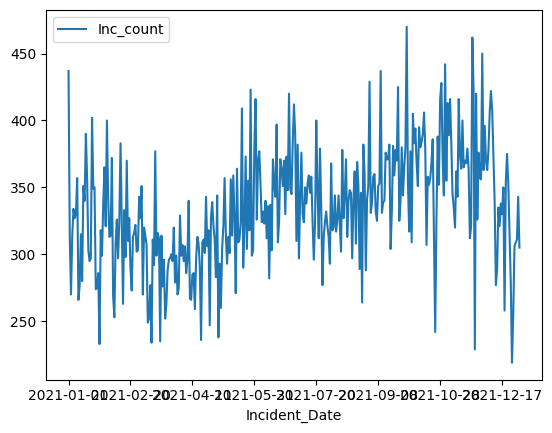

In [75]:
dates.plot()
plt.show()

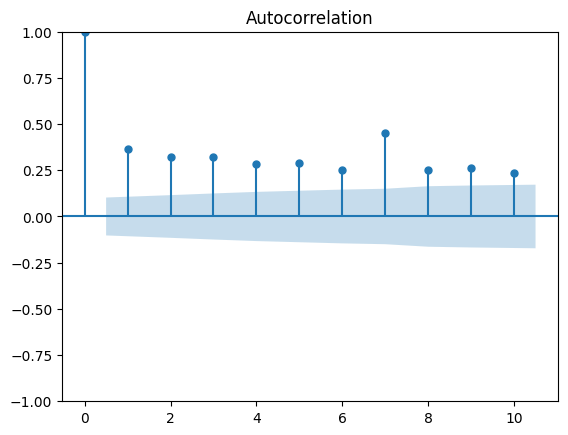

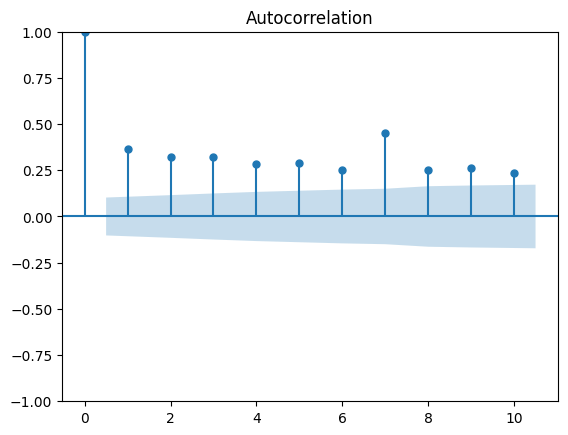

In [76]:
plot_acf(dates, lags = 10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<Axes: xlabel='Incident_Date'>

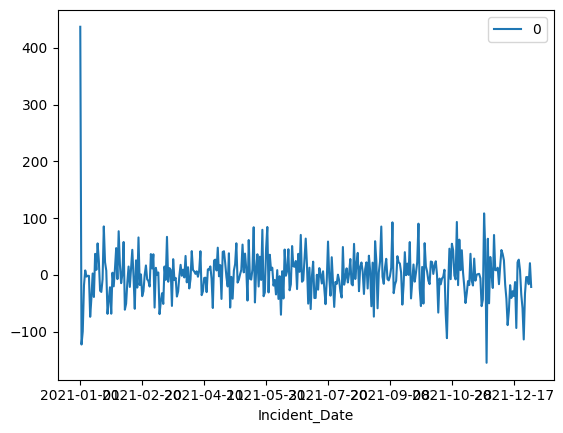

<Axes: ylabel='Density'>

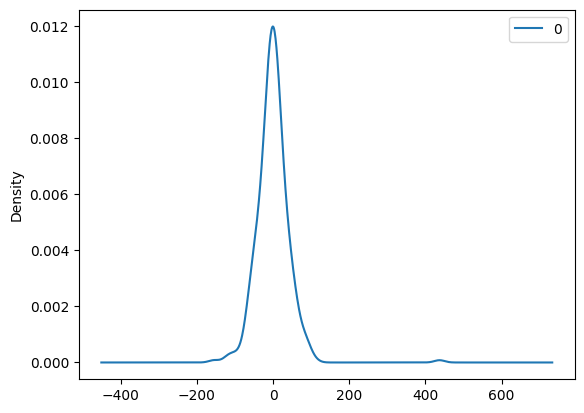

                0
count  365.000000
mean    -0.086976
std     43.591840
min   -154.733289
25%    -20.406265
50%     -0.944225
75%     20.146401
max    437.000000


In [77]:
timeSeries_model = ARIMA(dates, order=(1,1,7))

residuals = pd.DataFrame(timeSeries_model.fit().resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted= 352.962662, expected = 288.000000
predicted= 337.557516, expected = 341.000000
predicted= 330.769102, expected = 351.000000
predicted= 342.028761, expected = 429.000000
predicted= 322.254385, expected = 331.000000
predicted= 356.228841, expected = 339.000000
predicted= 342.956094, expected = 358.000000
predicted= 332.700879, expected = 360.000000
predicted= 336.649175, expected = 332.000000
predicted= 329.979682, expected = 325.000000
predicted= 352.906156, expected = 351.000000
predicted= 341.265311, expected = 353.000000
predicted= 342.460787, expected = 437.000000
predicted= 356.244938, expected = 331.000000
predicted= 353.349585, expected = 339.000000
predicted= 349.537227, expected = 340.000000
predicted= 348.546407, expected = 376.000000
predicted= 344.320923, expected = 371.000000
predicted= 345.192720, expected = 371.000000
predicted= 373.501363, expected = 382.000000
predicted= 354.016396, expected = 304.000000
predicted= 354.392613, expected = 332.000000
predicted=

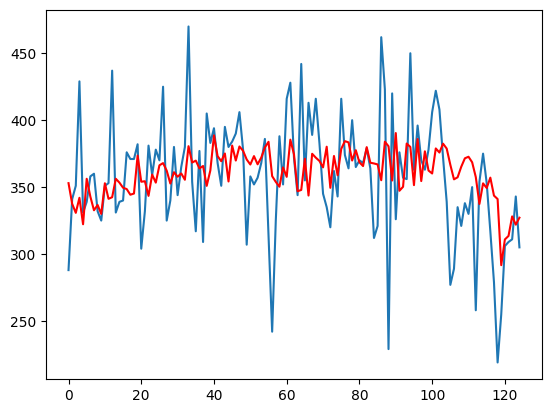

In [78]:
D = dates.values
size = int(len(D) * 0.66)
train, test = D[0:size], D[size:len(D)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,7))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted= %f, expected = %f' %(yhat,obs))
    
error = mean_squared_error(test, predictions)
print(' Test MSE : %3f' %error)


plt.plot(test)
plt.plot(predictions, color= 'red')
plt.show()

In [79]:
rmse_error = np.sqrt(mean_squared_error(test, predictions))
print(' Test RMSE : %3f' %rmse_error)

 Test RMSE : 42.569401
